# Assignment 2: Classification
# Using Machine Learning Tools

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of classifying data from histological cell images for the diagnosis of malignant breast cancer. This will be presented as a practical scenario where you are approached by a client to solve a problem.  

The main aims of this assignment are:

- to use the best practice machine learning workflow for producing a solution to a client's problem;
- to visualise and clean data;
- to train and optimise a selection of models, then choose the best;
- to obtain an unbiased measurement of the final model's performance;
- to interpret results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task, but feel free to add additional cells to structure your notebook. Note that some questions require writing code, some require graphical results, and some require comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (**with the correct results displayed**) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code can run correctly on the original data file.

This assignment uses the standard best practice machine learning workflow, building on the first assignment and course workshops, and so less detailed instructions are provided for this assignment. You should be able to implement this workflow now without low-level guidance and a substantial portion of the marks for this assignment are associated with the appropriate choices and executing this workflow correctly and efficiently. Make sure you have clean, readable code as well as producing outputs, since your coding will also count towards the marks (however, excessive commenting is discouraged and will lose marks, so aim for a modest, well-chosen amount of comments and text in outputs).

This assignment can be solved using methods from [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), and [matplotlib](https://matplotlib.org/stable/index.html) as presented in the workshops. Other libraries should not be used (even though they might have nice functionality) and occasionally certain specific functions need to be used, which will be made clear in the instruction text. You are expected to make sure that you are using functions correctly, and you should search and carefully read the documentation if unsure.

# Scenario

A client approaches you to solve a machine learning problem for them.  They run a pathology lab that processes histological images for healthcare providers and they have created a product that measures most of the same features as in the *Wisconsin breast cancer data set* though using different acquisitions and processing methods. Their method employs efficient stochastic sampling, making it much faster than existing methods, although slightly noisier. This method does not measure any of the 'worst' features that appear in the *Wisconsin Breast Cancer Data Set*. They want to be able to diagnose *malignant* cancer (and distinguish them from *benign* growths) by employing machine learning techniques, and they have asked you to implement this for them.

Their requirements are:
 - 1) Have at least a 90% probability of detecting malignant cancer when it is present;
 - 2) Ensure that no more than 1 in 5 healthy cases (those with benign growths) result in a false positive (labeled as malignant).

They have hand-labelled 220 samples for you, with 20 features per sample, which is all they have at the moment.

Please follow the instructions below, which will vary in level of detail.

## 1. Load data, visualise it and identify erroneous values [30%]

 - Load the data from the csv file `assignment2_data_2024.csv` (found on MyUni).
 - Extract the feature names and label names for use later on.
 - Provide at least one text summary of the dataset. This should include key information and characteristics of the data.
 - Create one graphical plot per feature. Each plot must display the feature values for the two classes (malignant and benign) separately on a single axis/panel.
 - Make sure you clearly label the graphical plots with respect to feature names, axes, classes, etc.
 - Identify any erroneous values in the dataset during the data visualisation or summary steps. Determine and implement, here or later, the appropriate action to handle these values (e.g., removal, correction, or none).
 - Throughout this assignment, treat the _malignant_ cases as the _true positive_ class, following the standard convention in medicine.
.

In [741]:
# This code imports some libraries that you will need.
# You should not need to modify it, though you are expected to make other imports later in your code.

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import time

# Pandas for overview
import pandas as pd

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn import tree
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Plot setup
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=7)
mpl.rc('xtick', labelsize=6)
mpl.rc('ytick', labelsize=6)
mpl.rc('figure', dpi=240)
plt.close('all')

import seaborn as sns

In [743]:
#Loading the dataset
cancer_df = pd.read_csv("assignment2_data_2024.csv")
cancer_df

,label,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error
0,malignant,15.494653829645529,15.902542,103.008265,776.437239,0.104239,0.168660,0.170572,0.085668,0.205053,...,0.653654,1.096678,4.962255,80.619370,0.006669,0.034950,0.043568,0.013765,0.024093,0.004928
1,malignant,16.229870799611437,18.785613,105.176755,874.712003,0.091843,0.092548,0.081681,0.053670,0.180435,...,0.445451,1.043931,3.005373,50.407958,0.006352,0.019998,0.025324,0.012172,0.018084,0.003582
2,malignant,16.34567074196476,20.114076,107.083804,872.563251,0.099924,0.123799,0.128788,0.078310,0.189756,...,0.549625,1.057447,3.643671,62.732851,0.006757,0.031325,0.034350,0.015150,0.021459,0.004066
3,maligant,13.001009157806651,19.876997,85.889775,541.281012,0.113423,0.173069,0.146214,0.069574,0.212078,...,0.430693,1.202955,3.051434,33.614356,0.007930,0.044881,0.042972,0.014556,0.035670,0.005981
4,malignant,16.416060073302194,17.397533,107.857386,891.516818,0.097321,0.111530,0.125971,0.068575,0.179562,...,0.525532,1.045900,3.747194,59.164555,0.008718,0.024231,0.039763,0.014202,0.019236,0.004115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,benign,13.618925155145831,17.270102,88.166812,593.279565,0.096065,0.094450,0.058880,0.036769,0.173312,...,0.313583,1.029905,2.217009,28.819166,0.006705,0.020034,0.023273,0.010344,0.017835,0.002852
216,benign,14.048463765049336,17.186671,90.974271,637.474225,0.094969,0.091549,0.063532,0.039494,0.173324,...,0.355219,1.068919,2.481640,33.861241,0.006128,0.020611,0.023855,0.010420,0.021327,0.003268
217,benign,12.879033083352171,16.767790,83.123369,539.225356,0.092146,0.083986,0.059347,0.035404,0.167690,...,0.314989,1.198787,2.230067,28.250520,0.005713,0.021280,0.024134,0.010947,0.024180,0.003778
218,benign,14.411990515442902,18.970674,93.423809,671.128126,0.086304,0.090118,0.070882,0.039482,0.175789,...,0.356964,1.030049,2.560170,35.435273,0.005784,0.022279,0.025244,0.009990,NaN,0.003255


In [916]:
#Text summary of the dataset
cancer_df.describe()

,label,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,...,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,0.309677,13.866156,18.849042,90.038631,626.710840,0.095900,0.098332,0.079463,0.045333,0.179886,...,0.377486,1.153185,2.638532,36.498023,0.006823,0.022794,0.028224,0.011031,0.019921,0.003453
std,0.463859,0.960262,1.318320,6.530876,88.244610,0.004483,0.014014,0.019146,0.010482,0.008060,...,0.061017,0.127528,0.411403,8.450573,0.000748,0.003236,0.004799,0.001473,0.001851,0.000387
min,0.000000,11.560025,16.359018,74.690886,477.371592,0.084651,0.075184,0.050771,0.028701,0.157059,...,0.298005,0.927722,2.059186,27.892423,0.005316,0.016907,0.018730,0.007253,0.016694,0.002631
25%,0.000000,13.296357,17.805184,86.224859,574.681559,0.092686,0.089160,0.065573,0.037661,0.173972,...,0.338936,1.059015,2.379325,31.563558,0.006288,0.020357,0.025168,0.010020,0.018448,0.003177
50%,0.000000,13.717382,18.806036,89.021276,606.370123,0.096063,0.095637,0.072751,0.042660,0.180214,...,0.358877,1.132216,2.511907,33.637684,0.006699,0.022030,0.027411,0.010973,0.019495,0.003411
75%,1.000000,14.260343,19.933429,92.761831,651.007694,0.098398,0.105829,0.090238,0.052291,0.185207,...,0.395955,1.231916,2.749905,37.555824,0.007364,0.024890,0.030872,0.011978,0.020984,0.003748
max,1.000000,16.733127,22.099859,108.712580,931.906522,0.107720,0.138477,0.142406,0.074210,0.200009,...,0.568483,1.506956,3.945888,66.285342,0.008739,0.031493,0.041202,0.014772,0.025165,0.004499


In [745]:
#Fixing erroneous values
cancer_df['mean radius']= pd.to_numeric(cancer_df['mean radius'], errors='coerce')#converting mean raidus to numeric
cancer_df['label'] = cancer_df['label'].replace({ 'maligant':'malignant'})#correcting values of label

In [747]:
#Extracting feature names and label names
feature_names = cancer_df.columns[1:]
label_names = cancer_df['label'].unique()
print(f'Features names are: {feature_names}')
print(f'Label names are: {label_names}')

Features names are: Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error'],
      dtype='object')
Label names are: ['malignant' 'benign']


In [749]:
#Removing outliers
cancer_df = cancer_df[cancer_df['mean radius'] <= 23]
cancer_df = cancer_df[(cancer_df['mean texture'] <= 23) & (cancer_df['mean texture'] >= 16)]
cancer_df=cancer_df[cancer_df['mean perimeter'] <= 115]
cancer_df=cancer_df[cancer_df['mean area'] >= 400]
cancer_df=cancer_df[cancer_df['mean smoothness'] <= 0.109]
cancer_df=cancer_df[cancer_df['mean compactness'] <= 0.16]
cancer_df=cancer_df[cancer_df['mean concavity'] <= 0.16]
cancer_df=cancer_df[cancer_df['mean concave points'] <= 0.085]
cancer_df=cancer_df[cancer_df['mean symmetry'] <= 0.205]
cancer_df=cancer_df[cancer_df['mean fractal dimension'] <= 0.070]
cancer_df=cancer_df[cancer_df['texture error'] <= 1.52]
cancer_df=cancer_df[cancer_df['perimeter error'] <= 4.5]
cancer_df=cancer_df[cancer_df['smoothness error'] <= 0.009]
cancer_df=cancer_df[cancer_df['compactness error'] <= 0.032]
cancer_df=cancer_df[cancer_df['concavity error'] <= 0.042]
cancer_df=cancer_df[cancer_df['concave points error'] <= 0.015]
cancer_df=cancer_df[cancer_df['symmetry error'] <= 0.0255]
cancer_df=cancer_df[cancer_df['fractal dimension error'] <= 0.0046]

#Coverting target values to 1 and 0
cancer_df['label'] = cancer_df['label'].map({'malignant': 1, 'benign': 0})

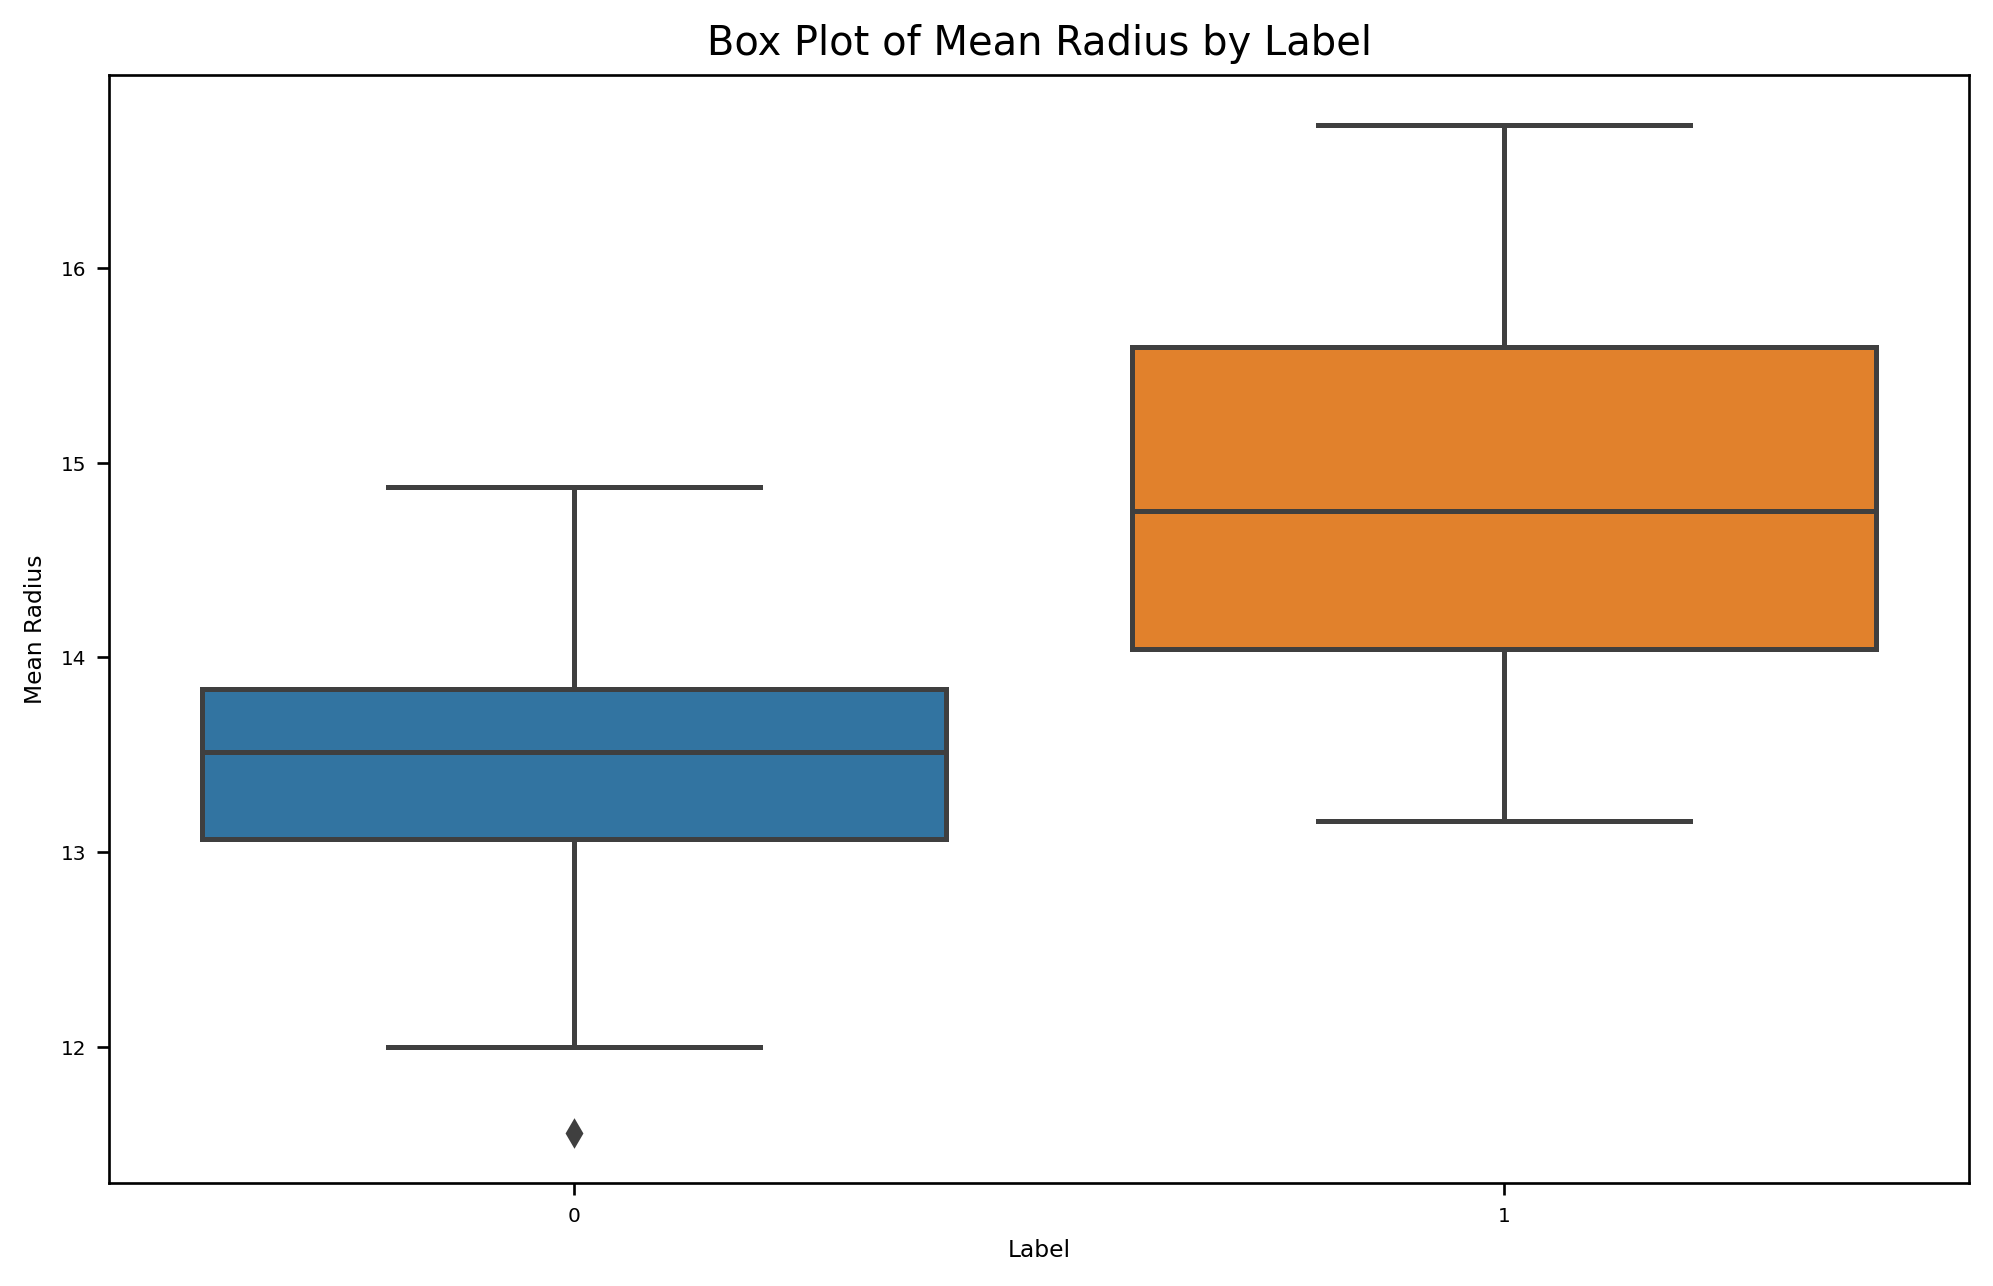

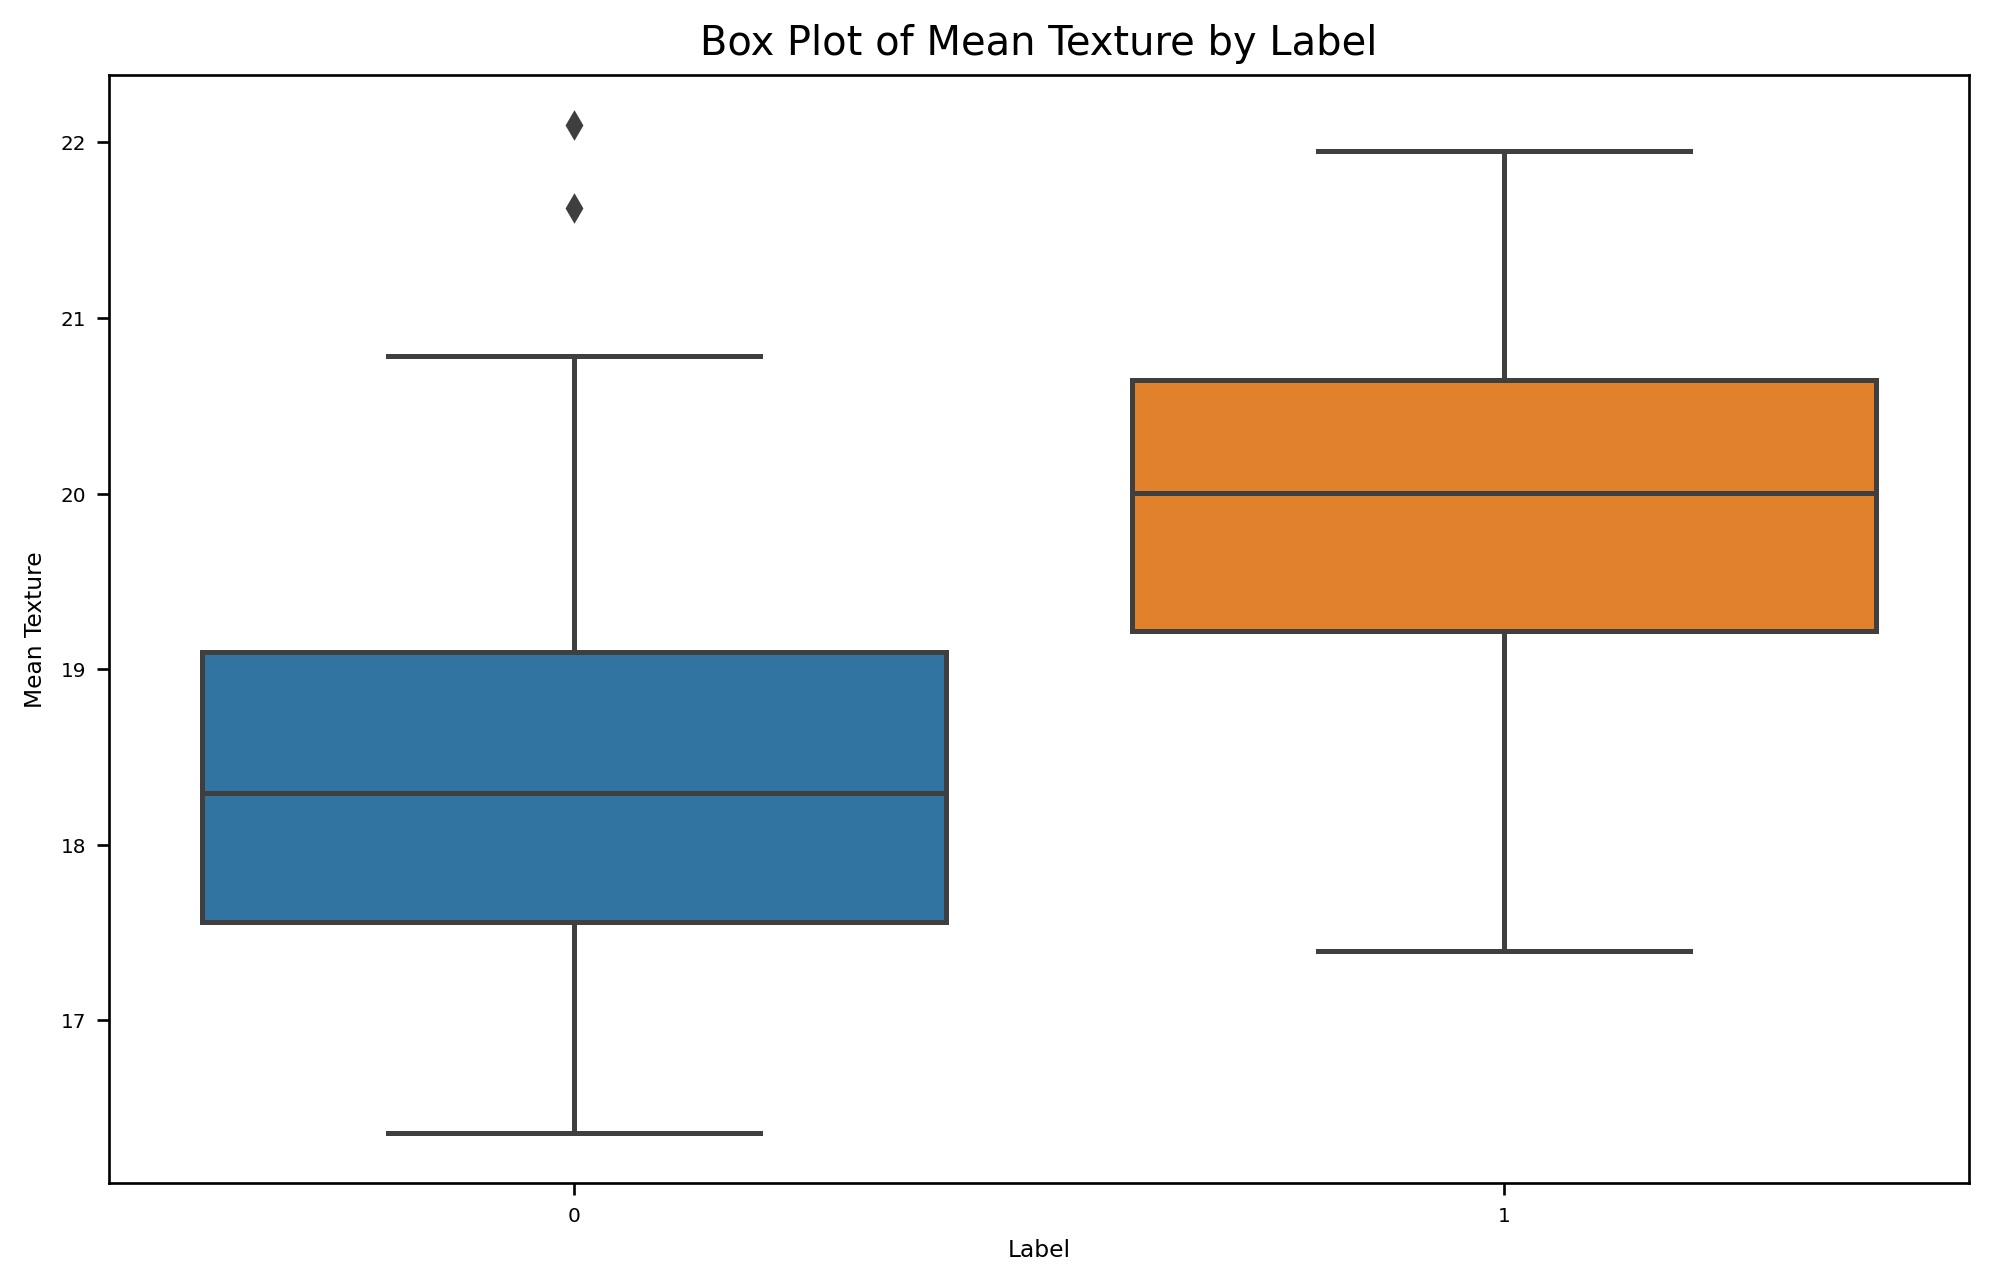

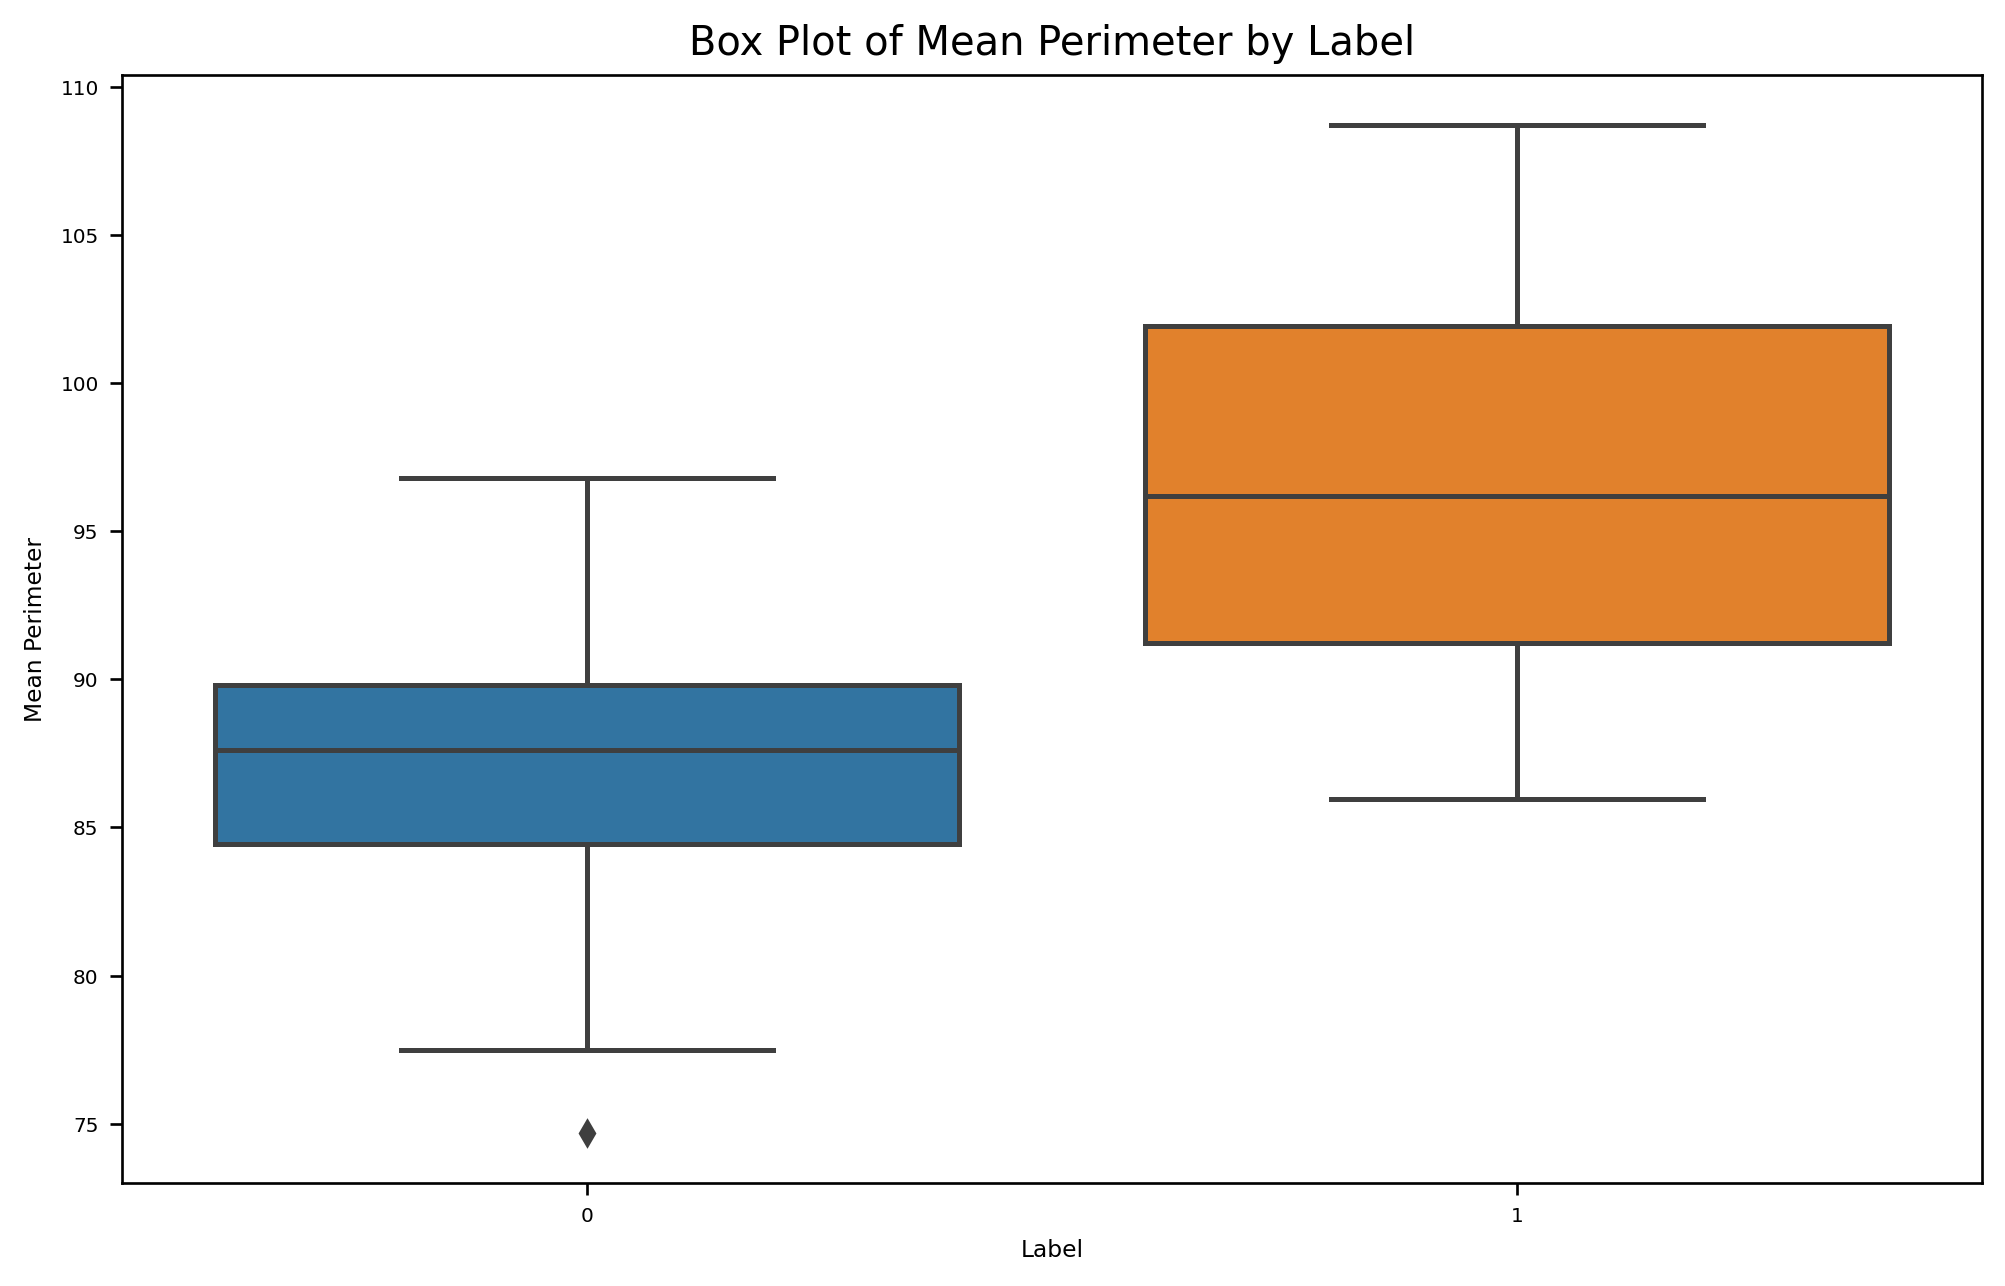

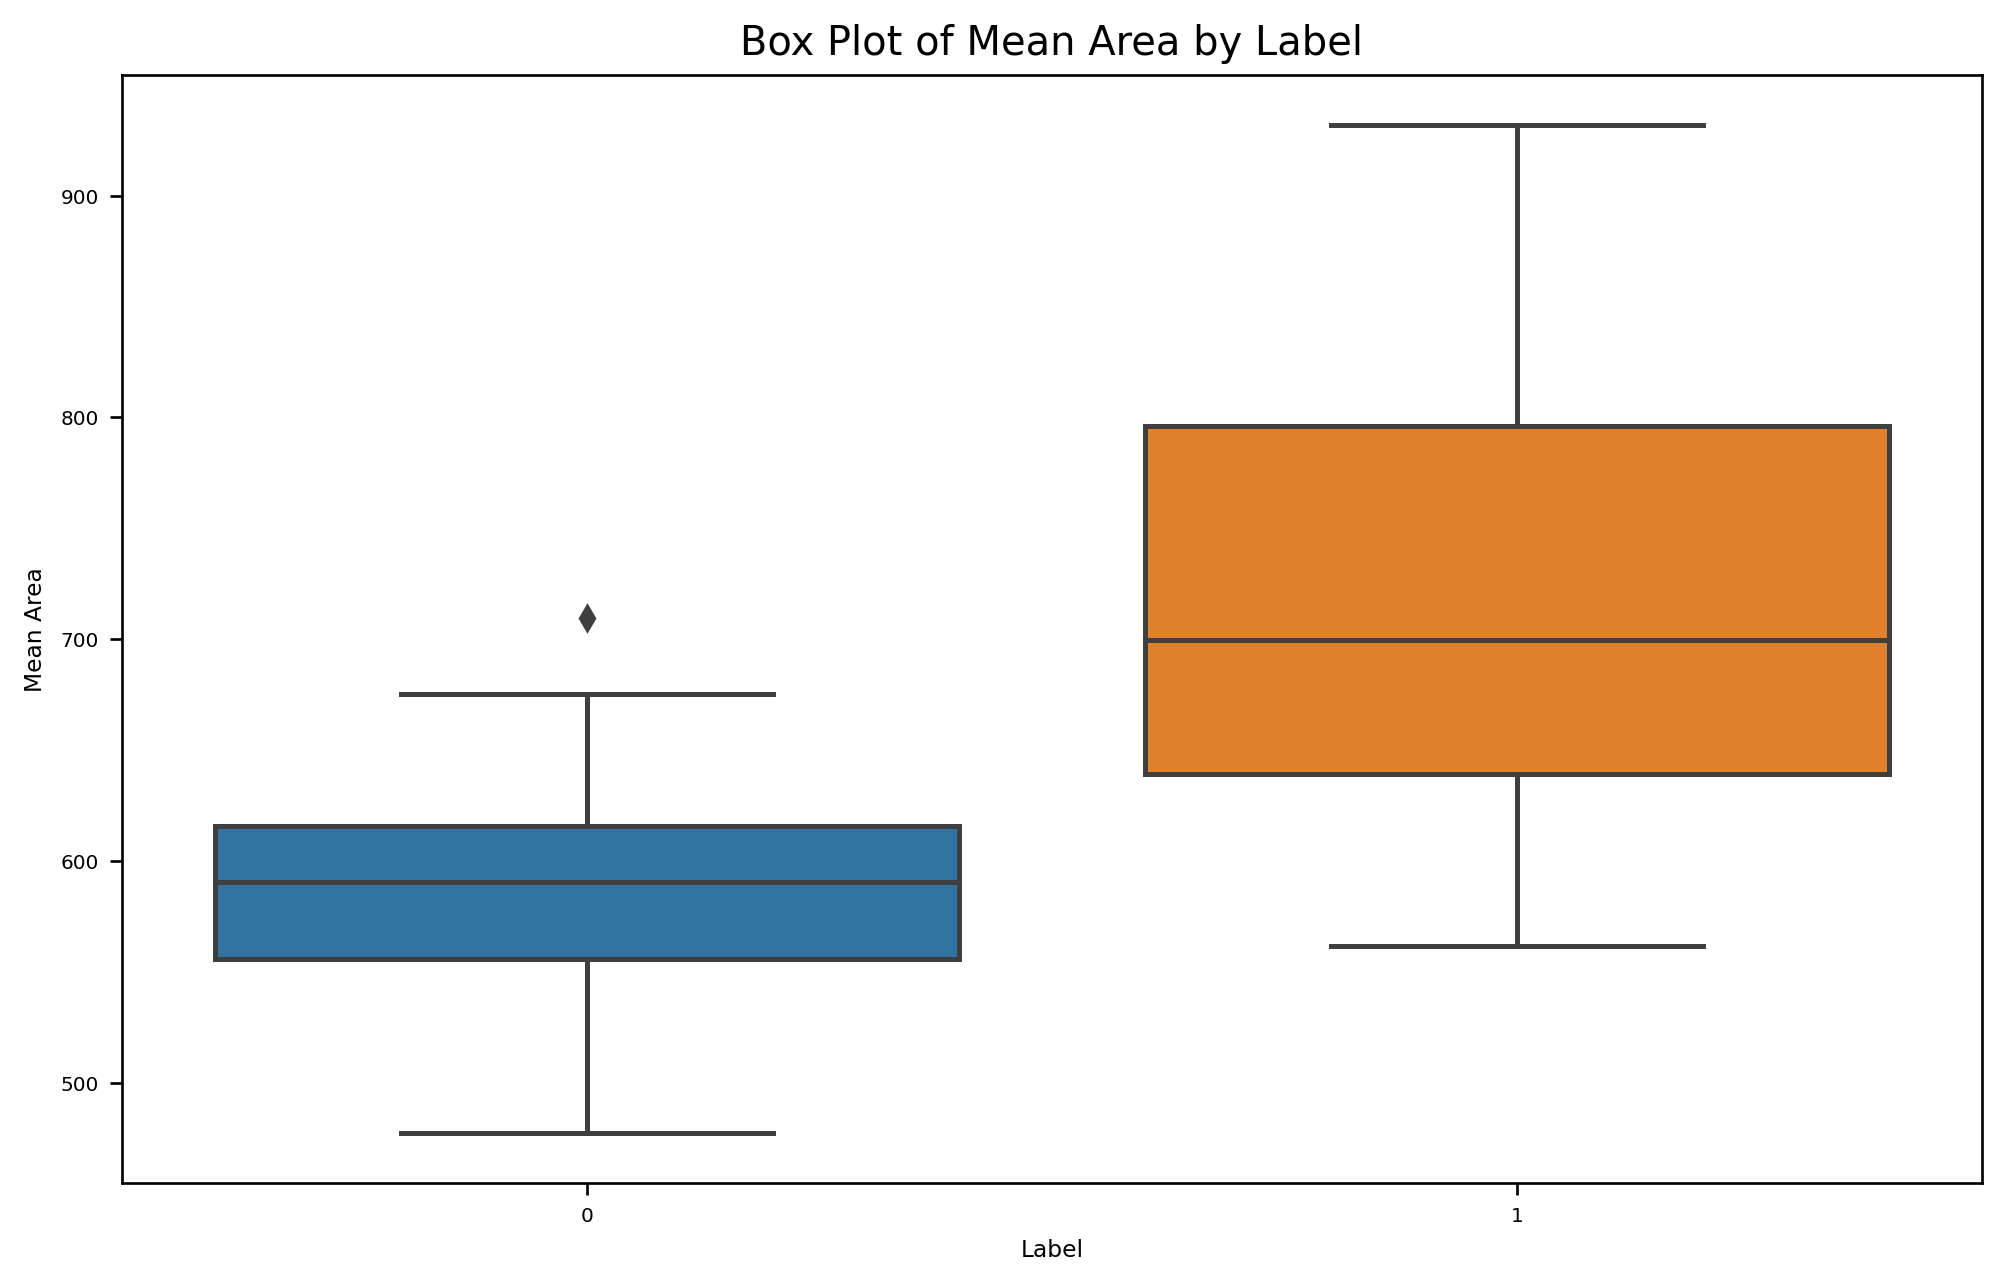

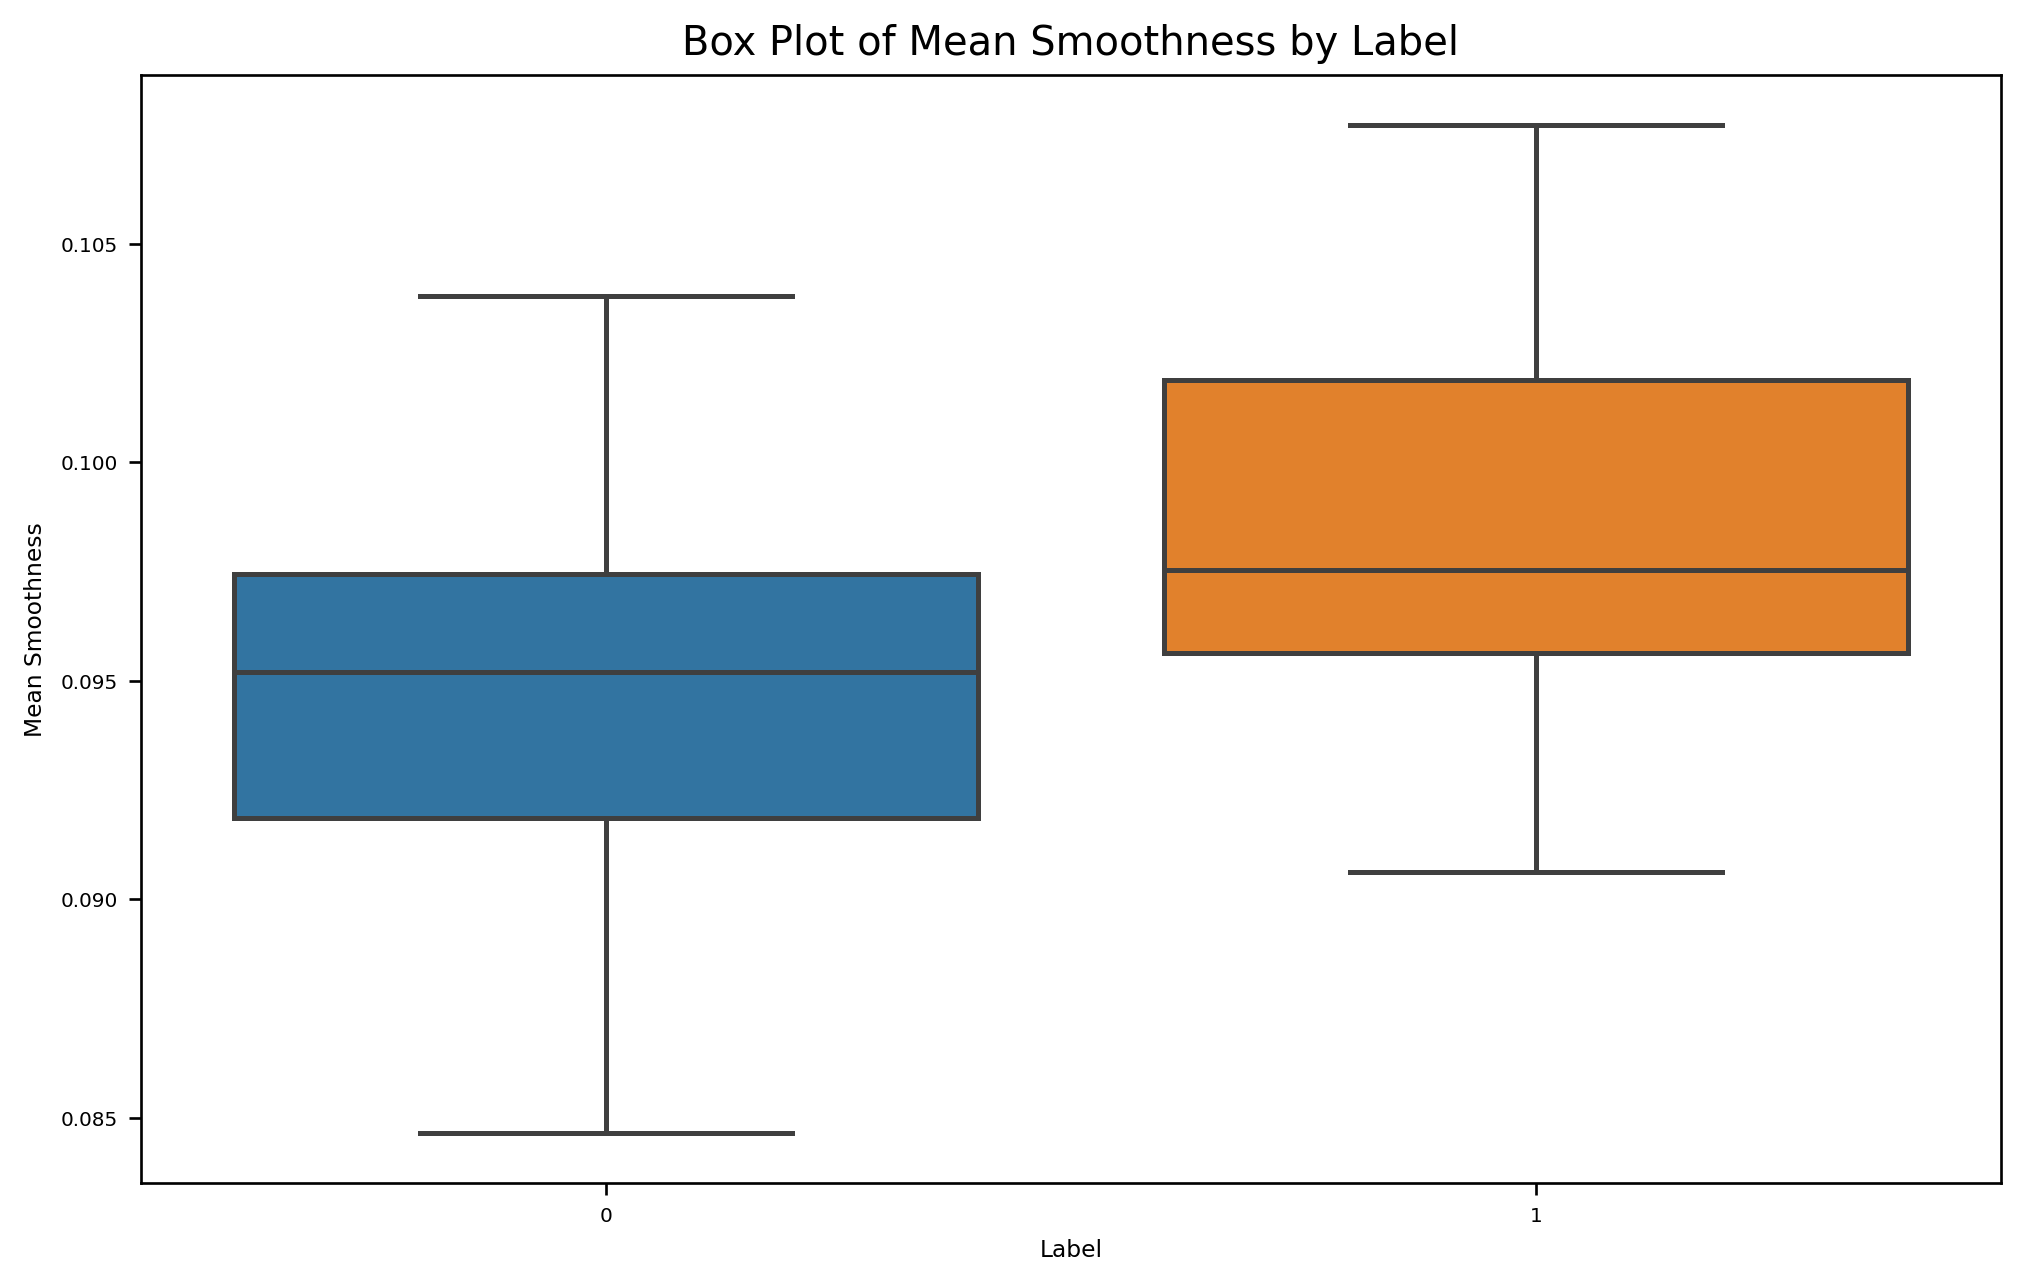

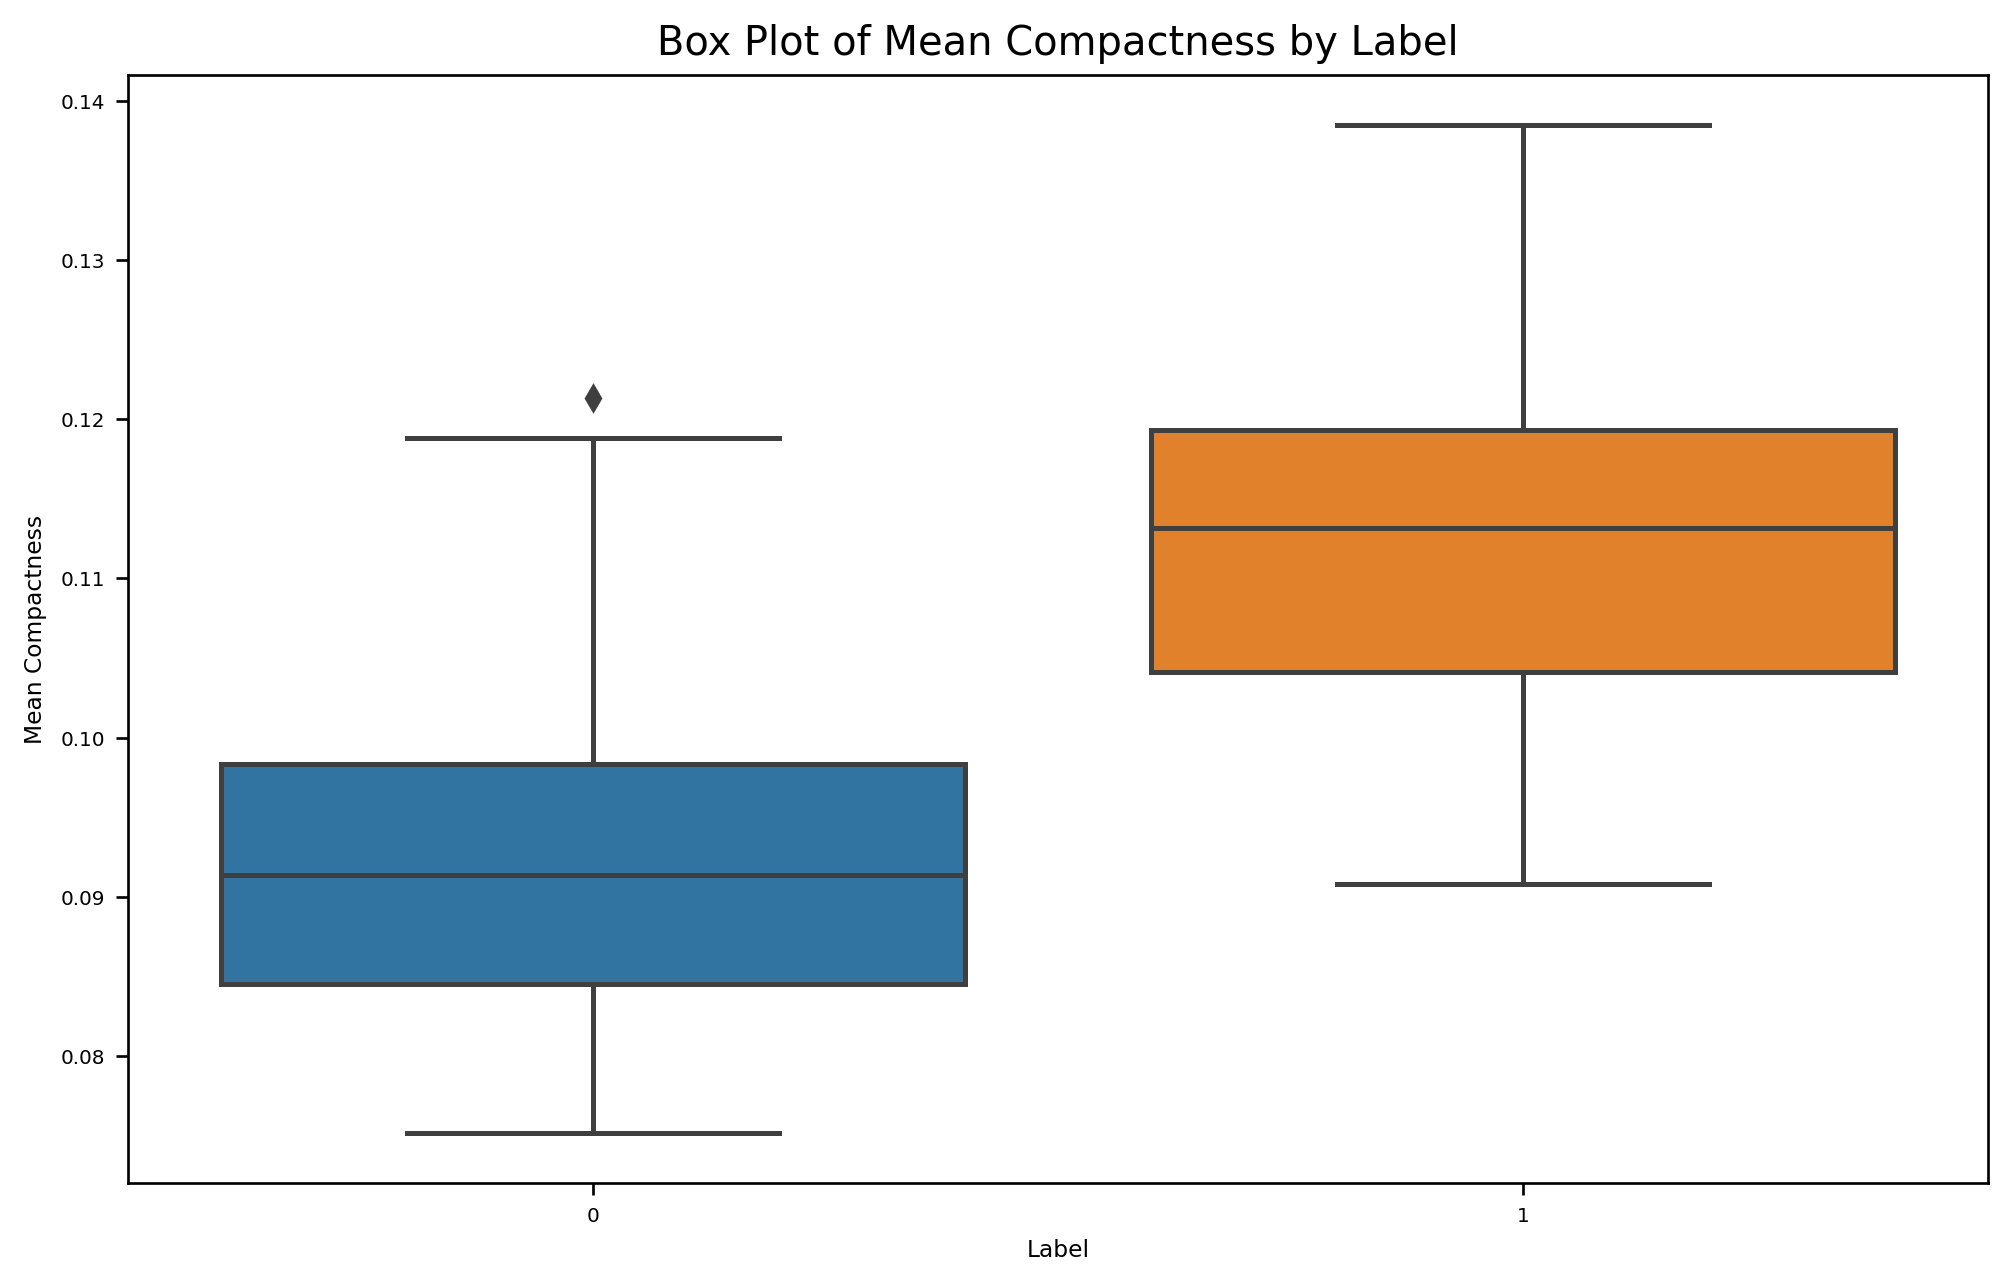

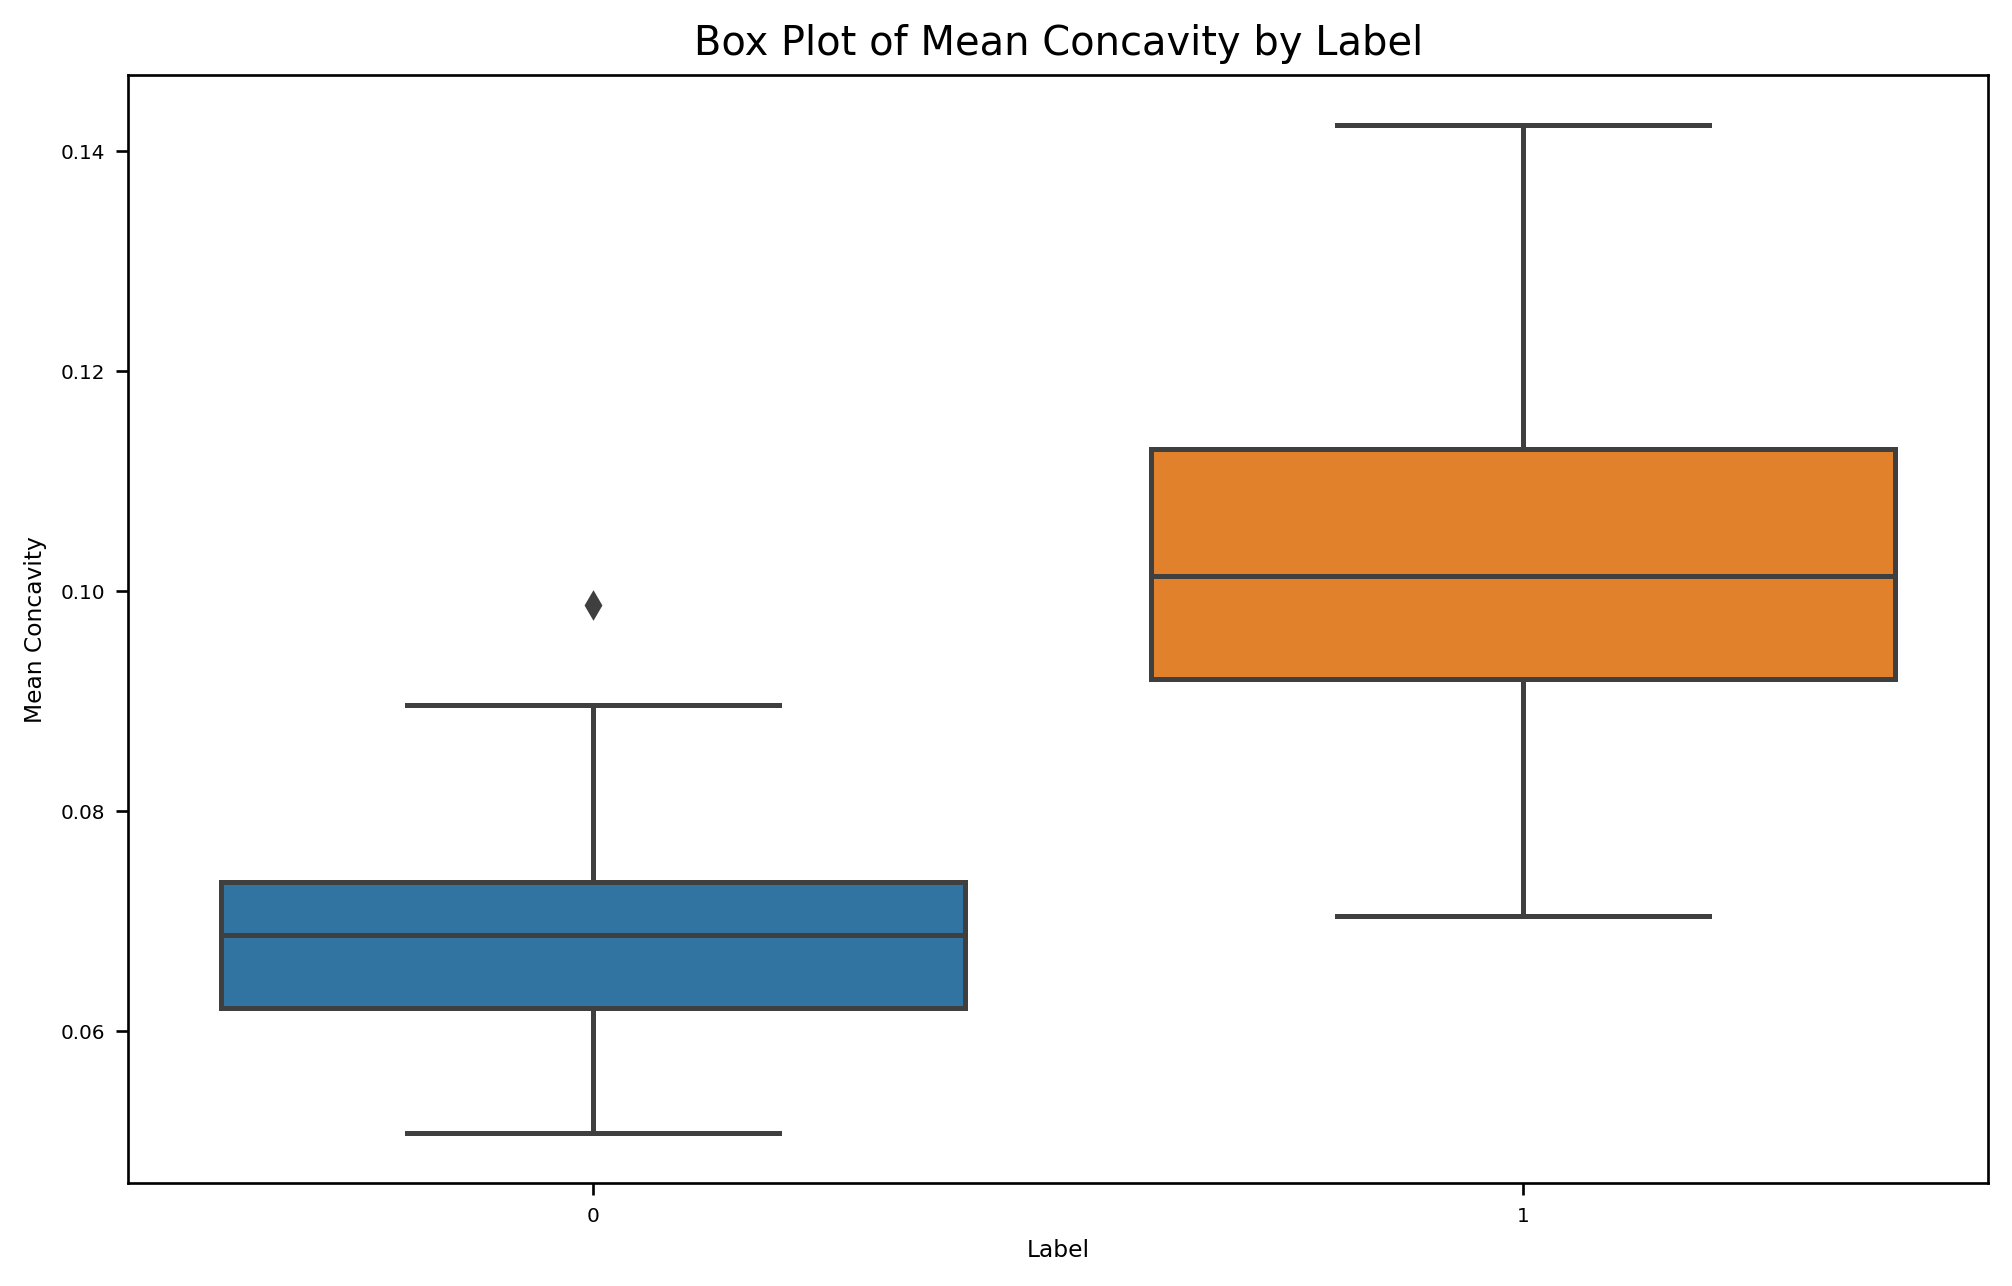

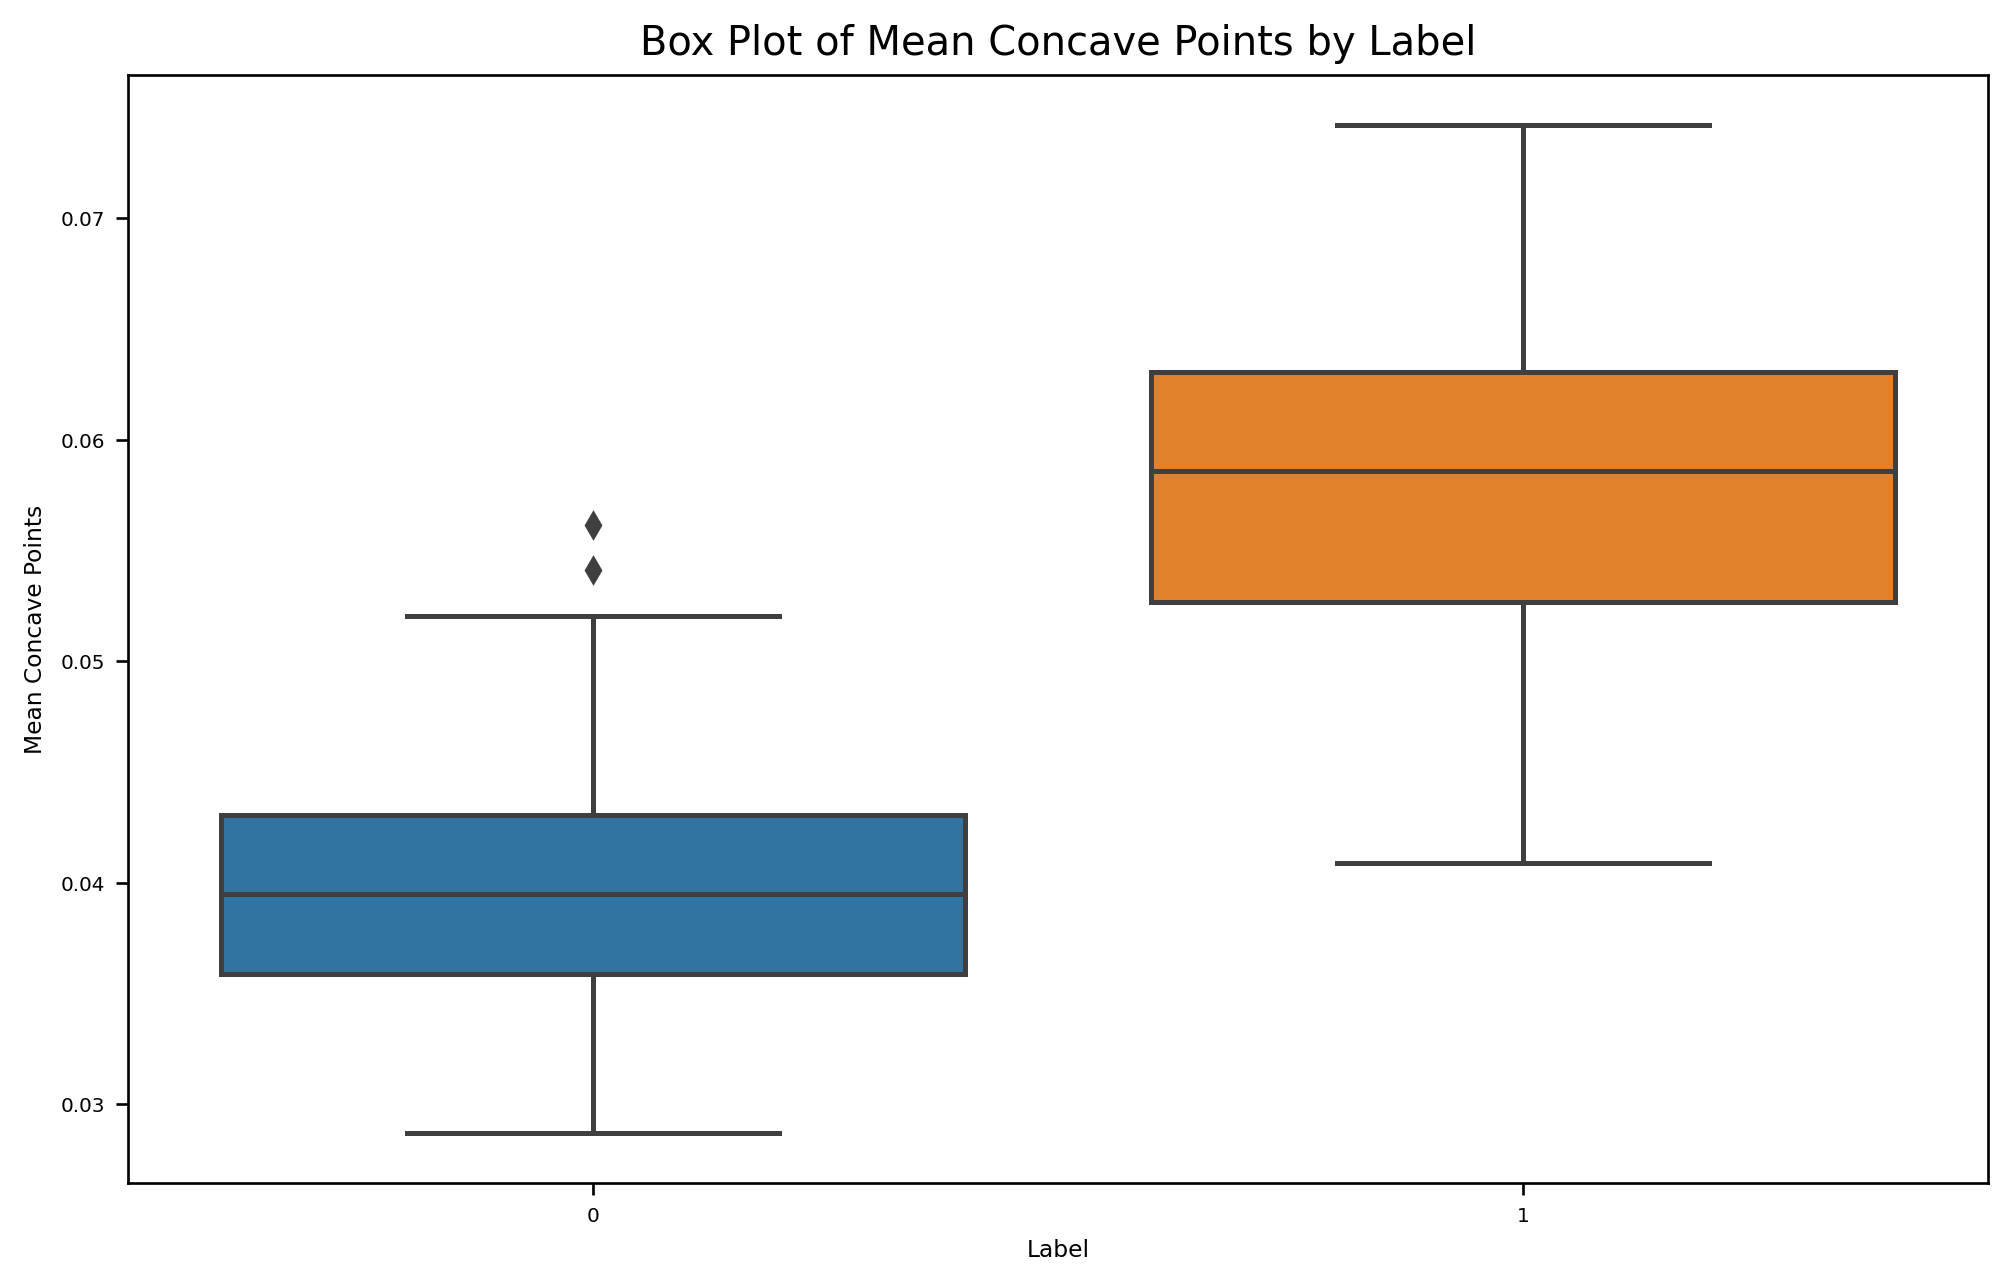

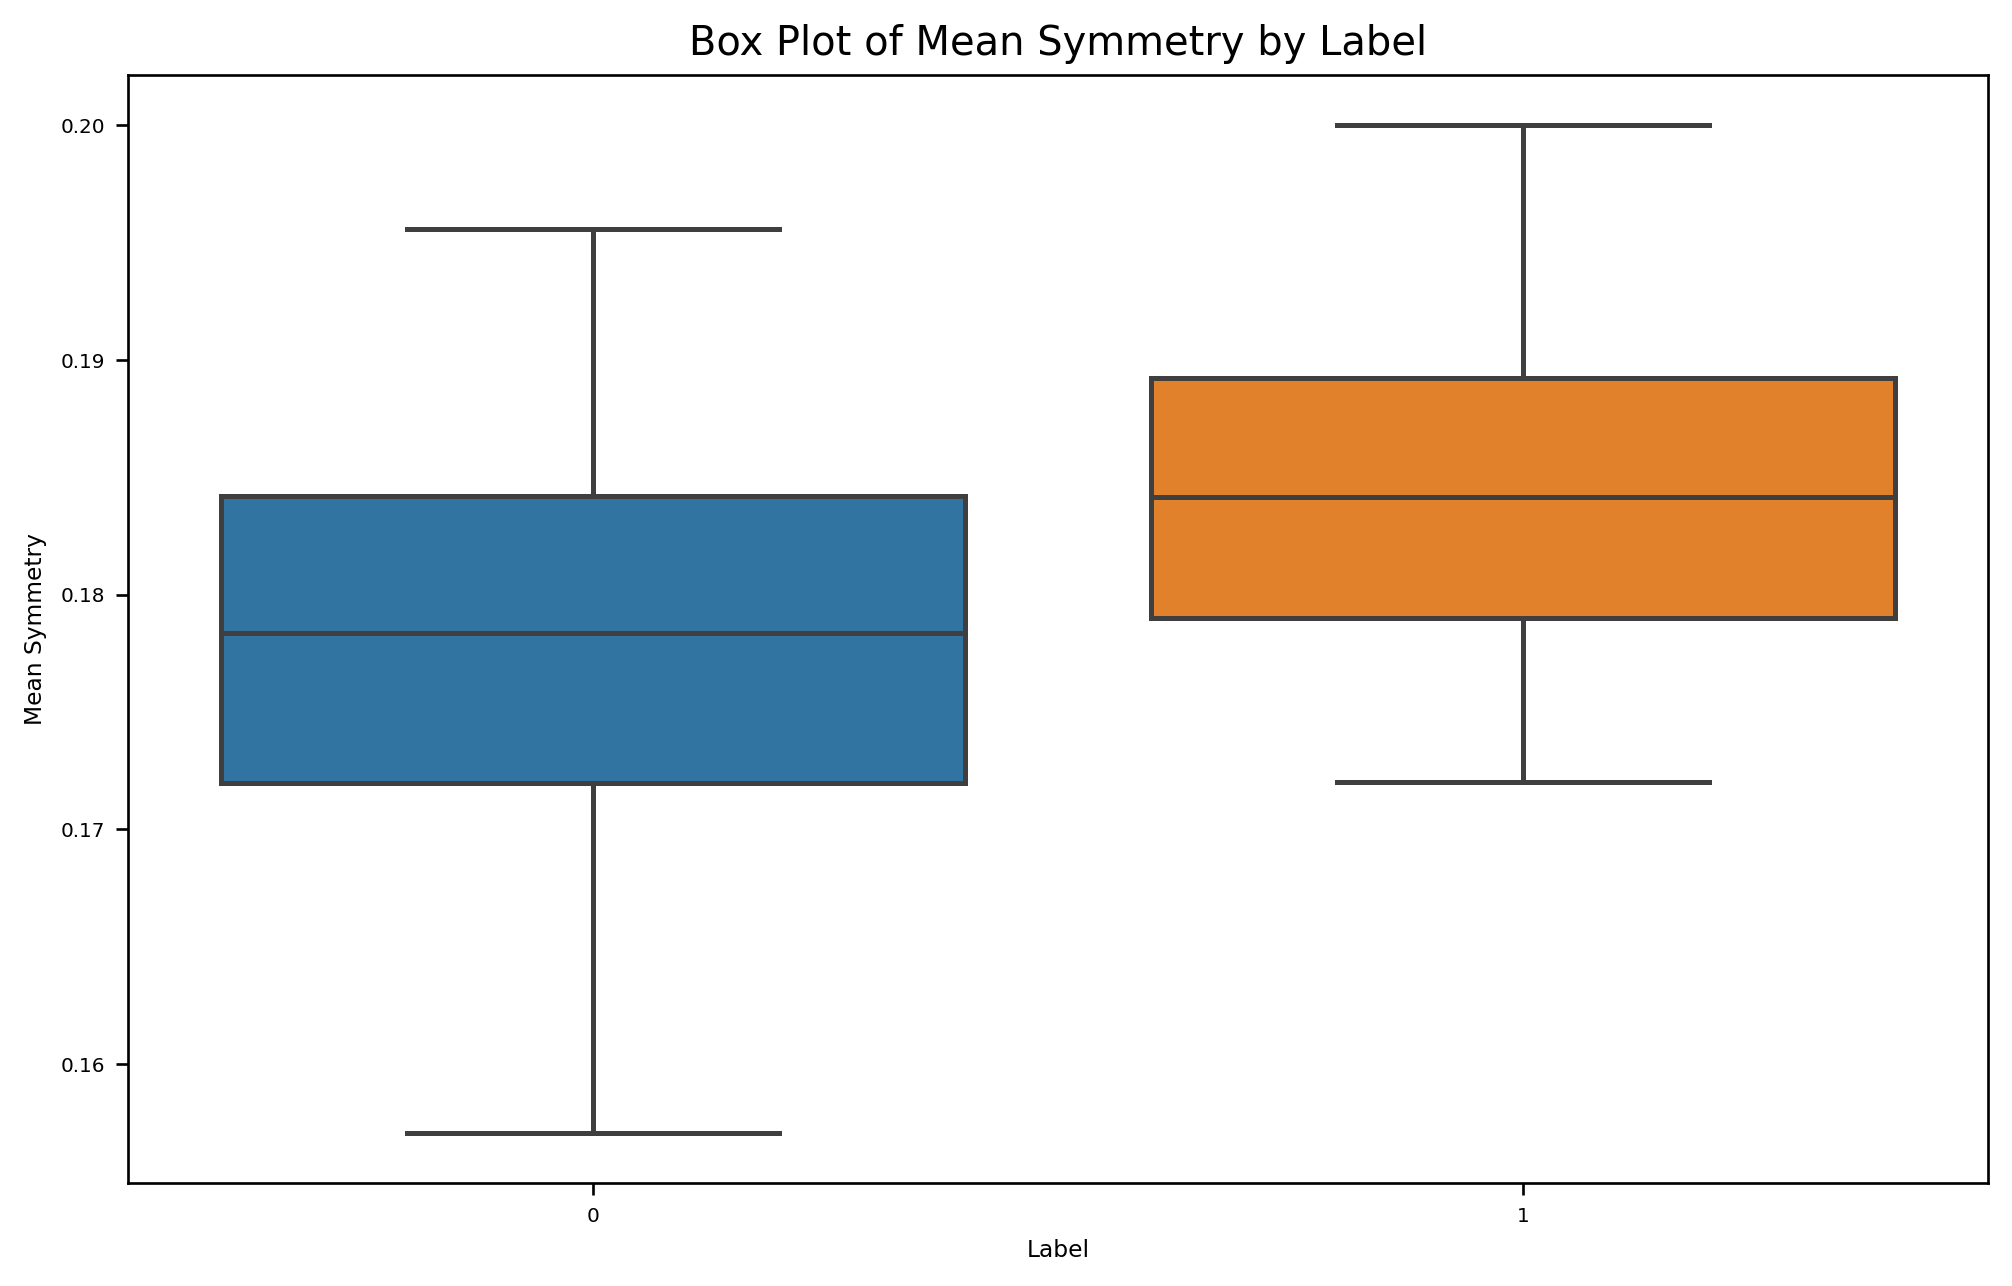

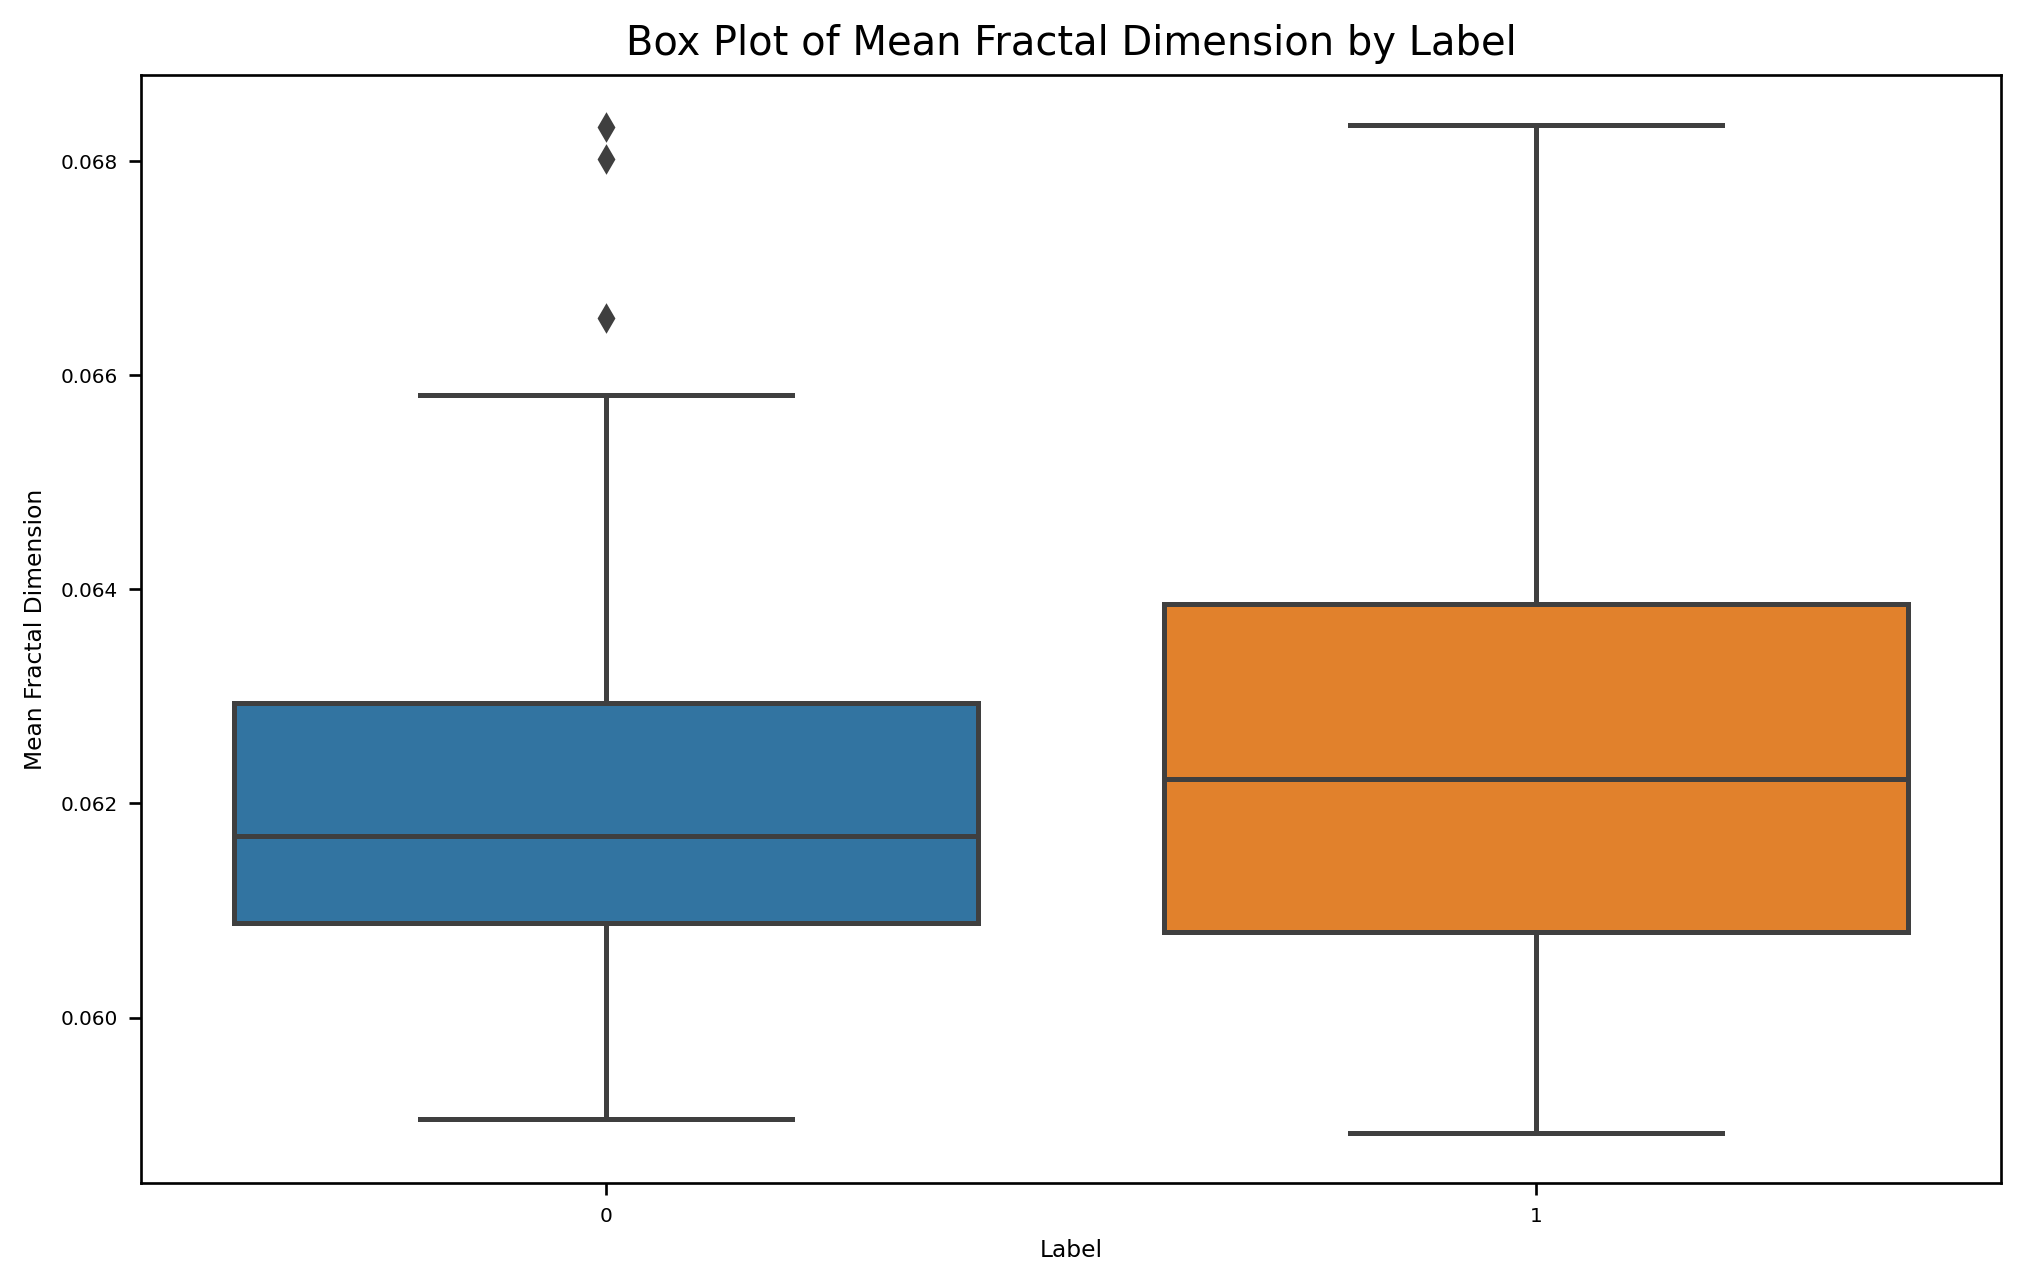

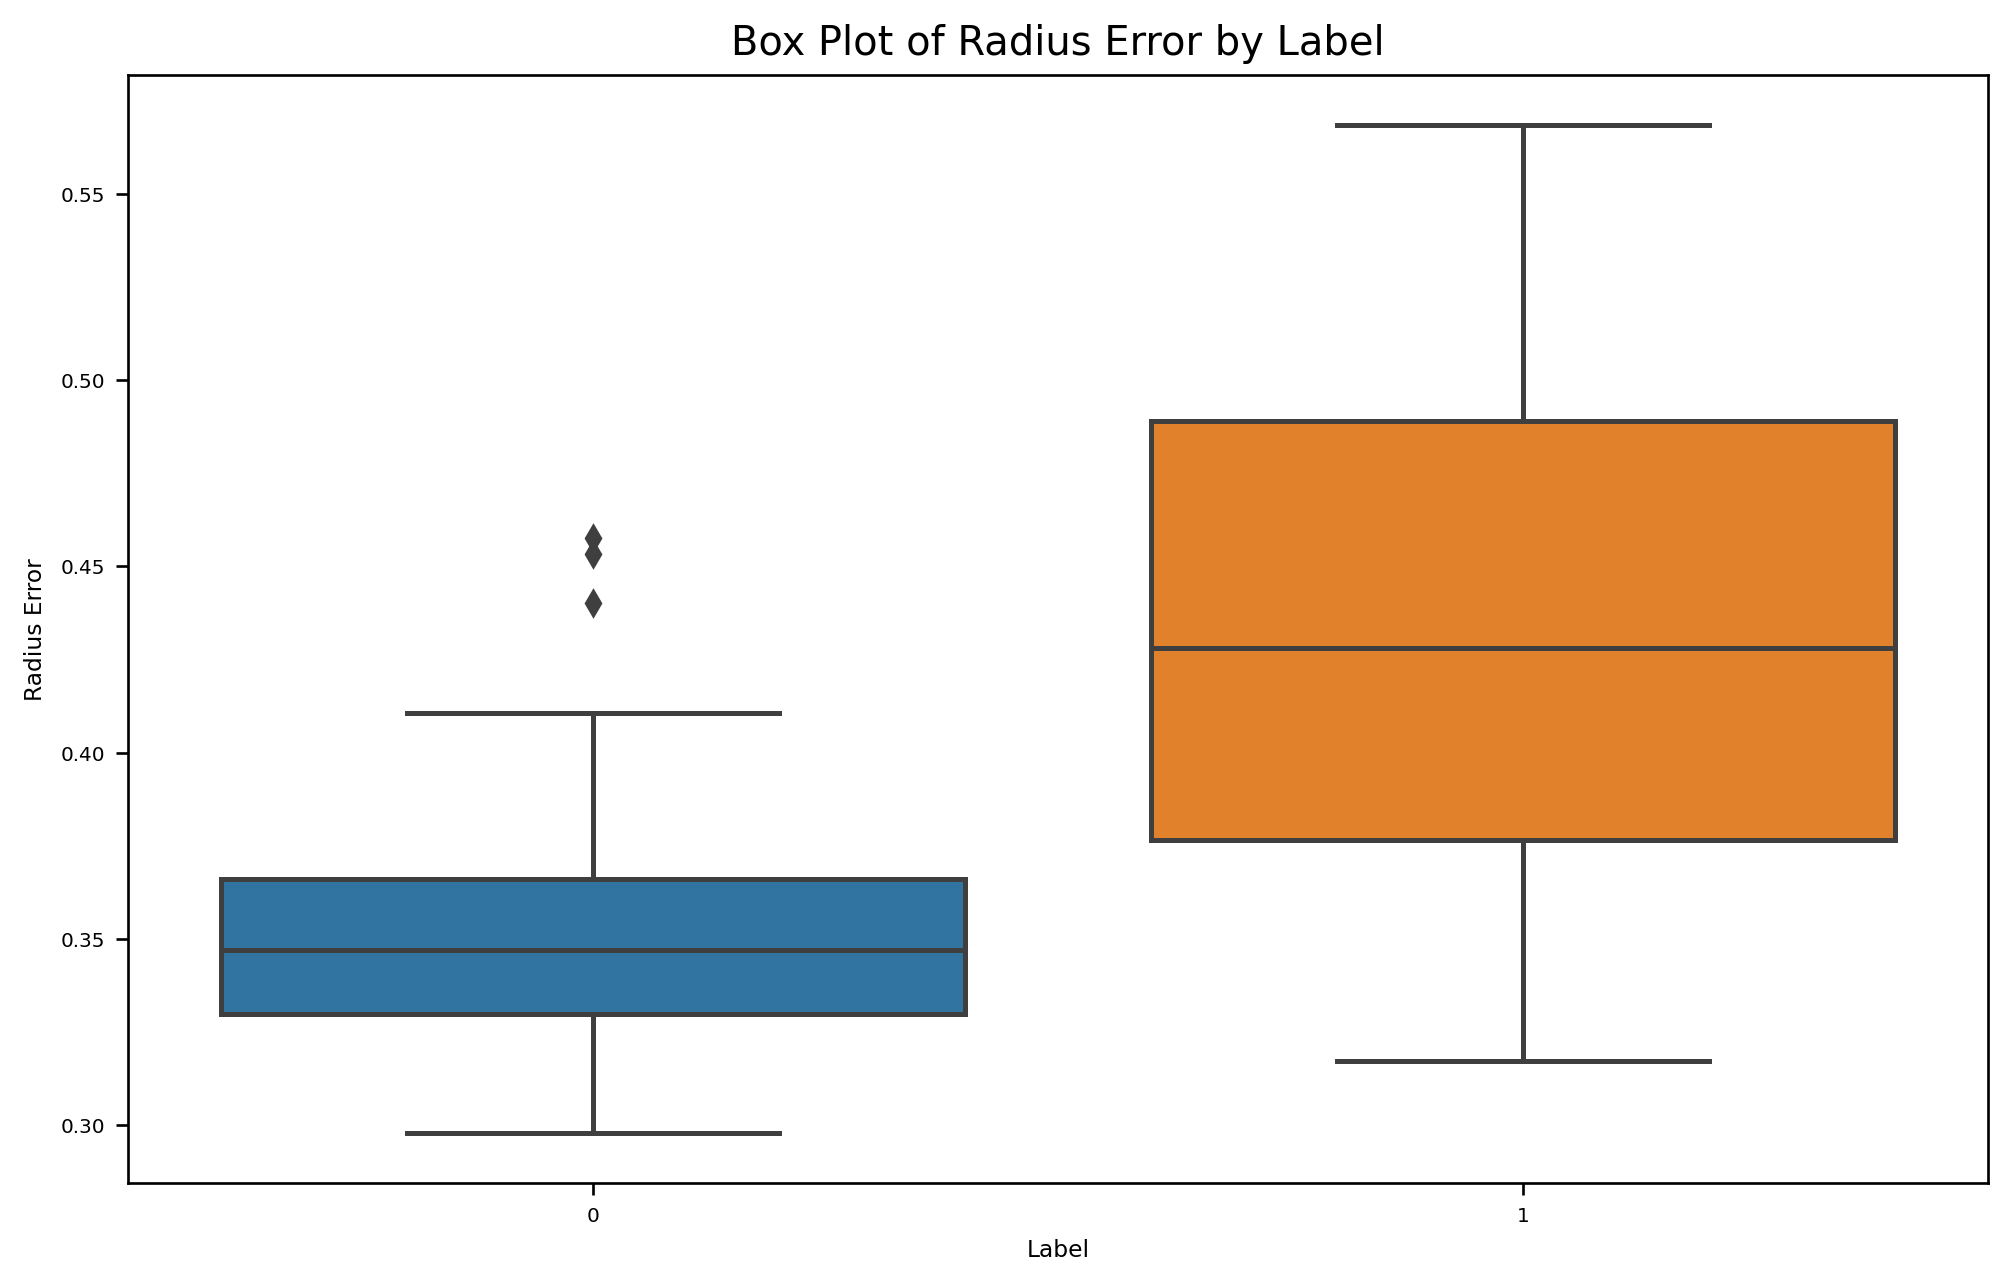

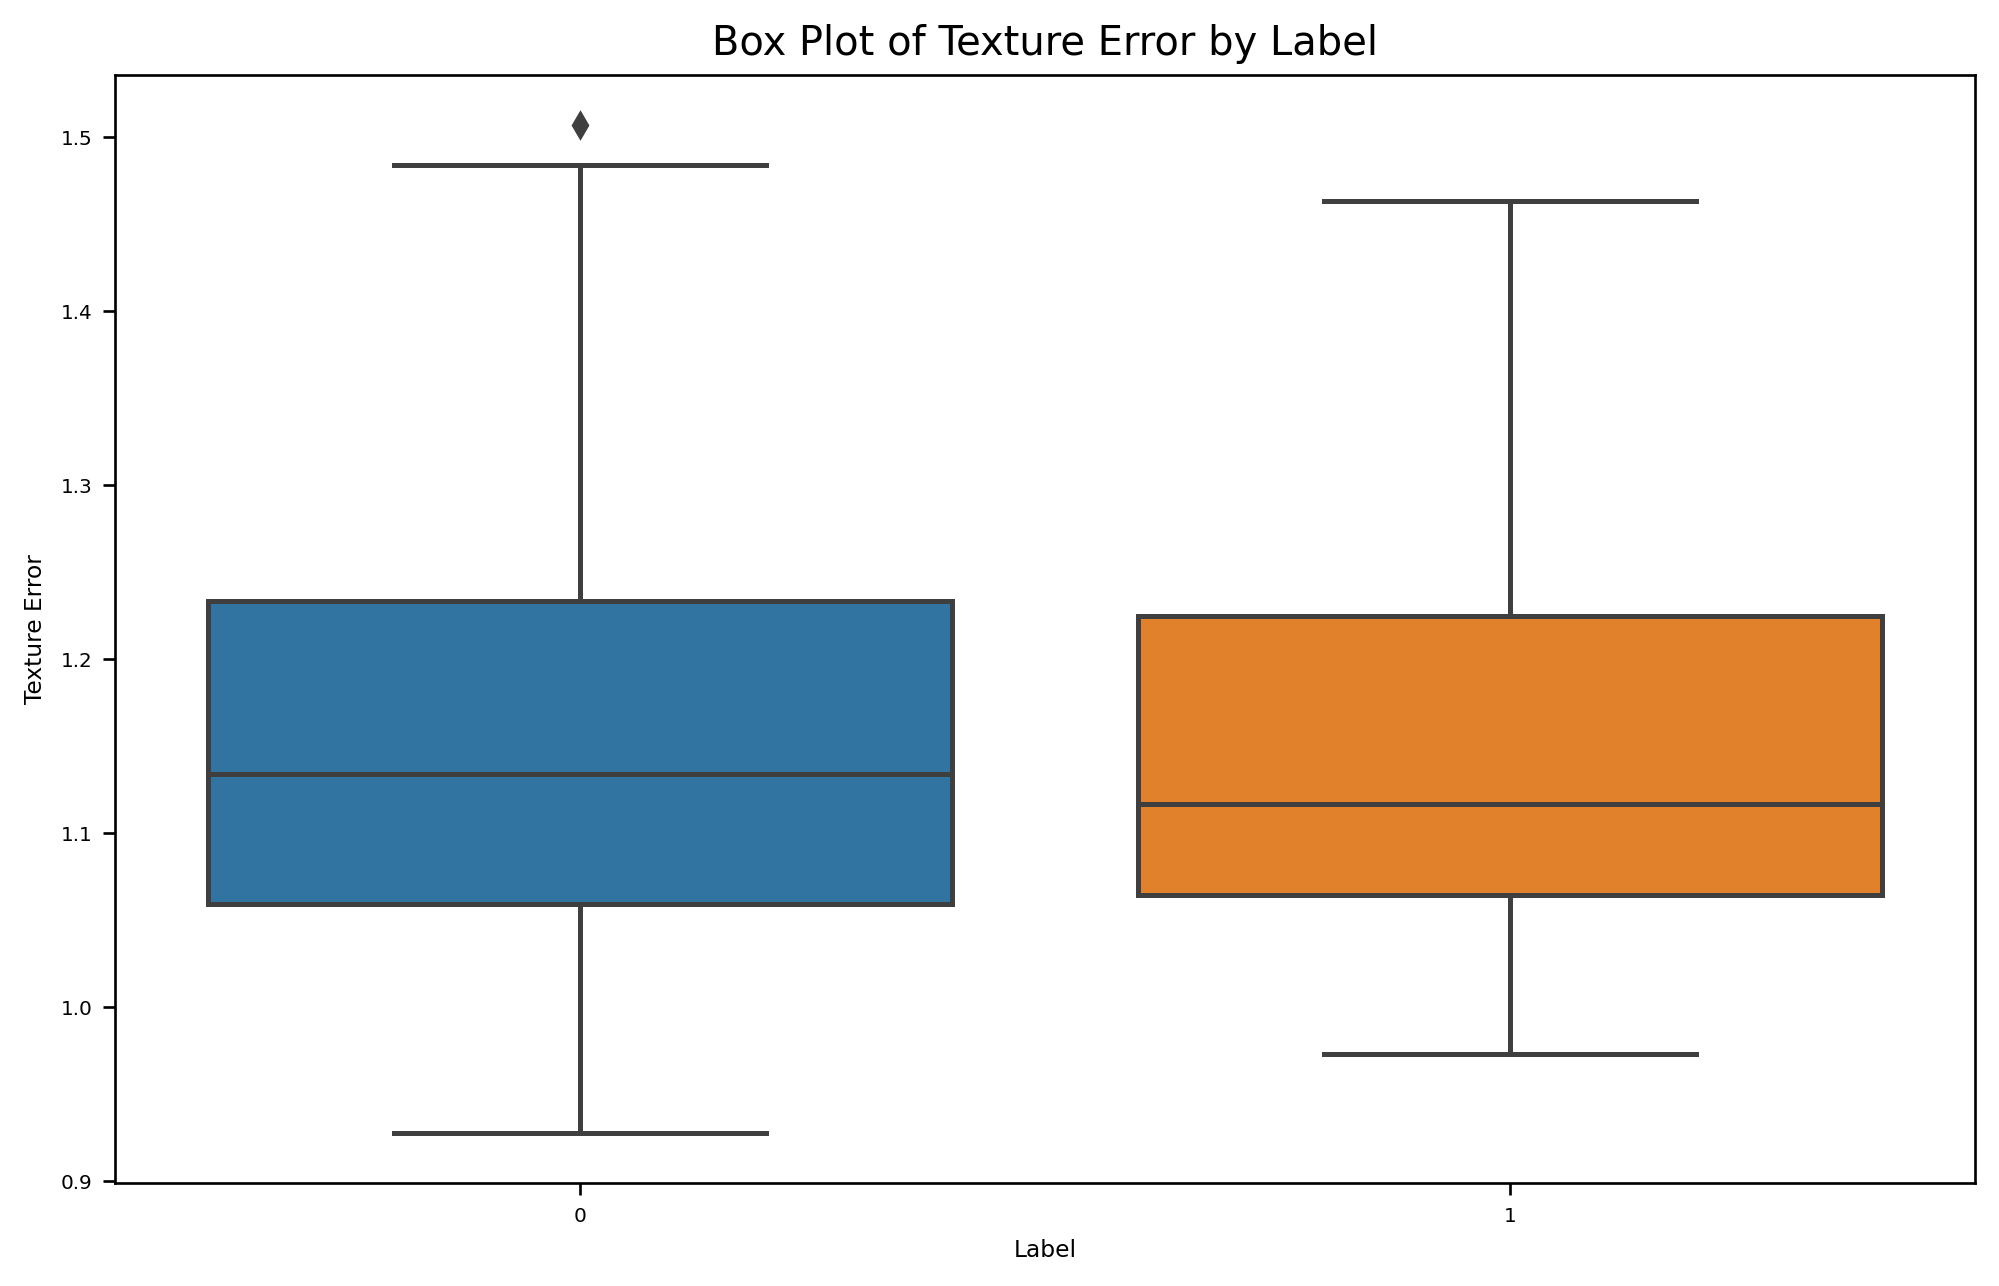

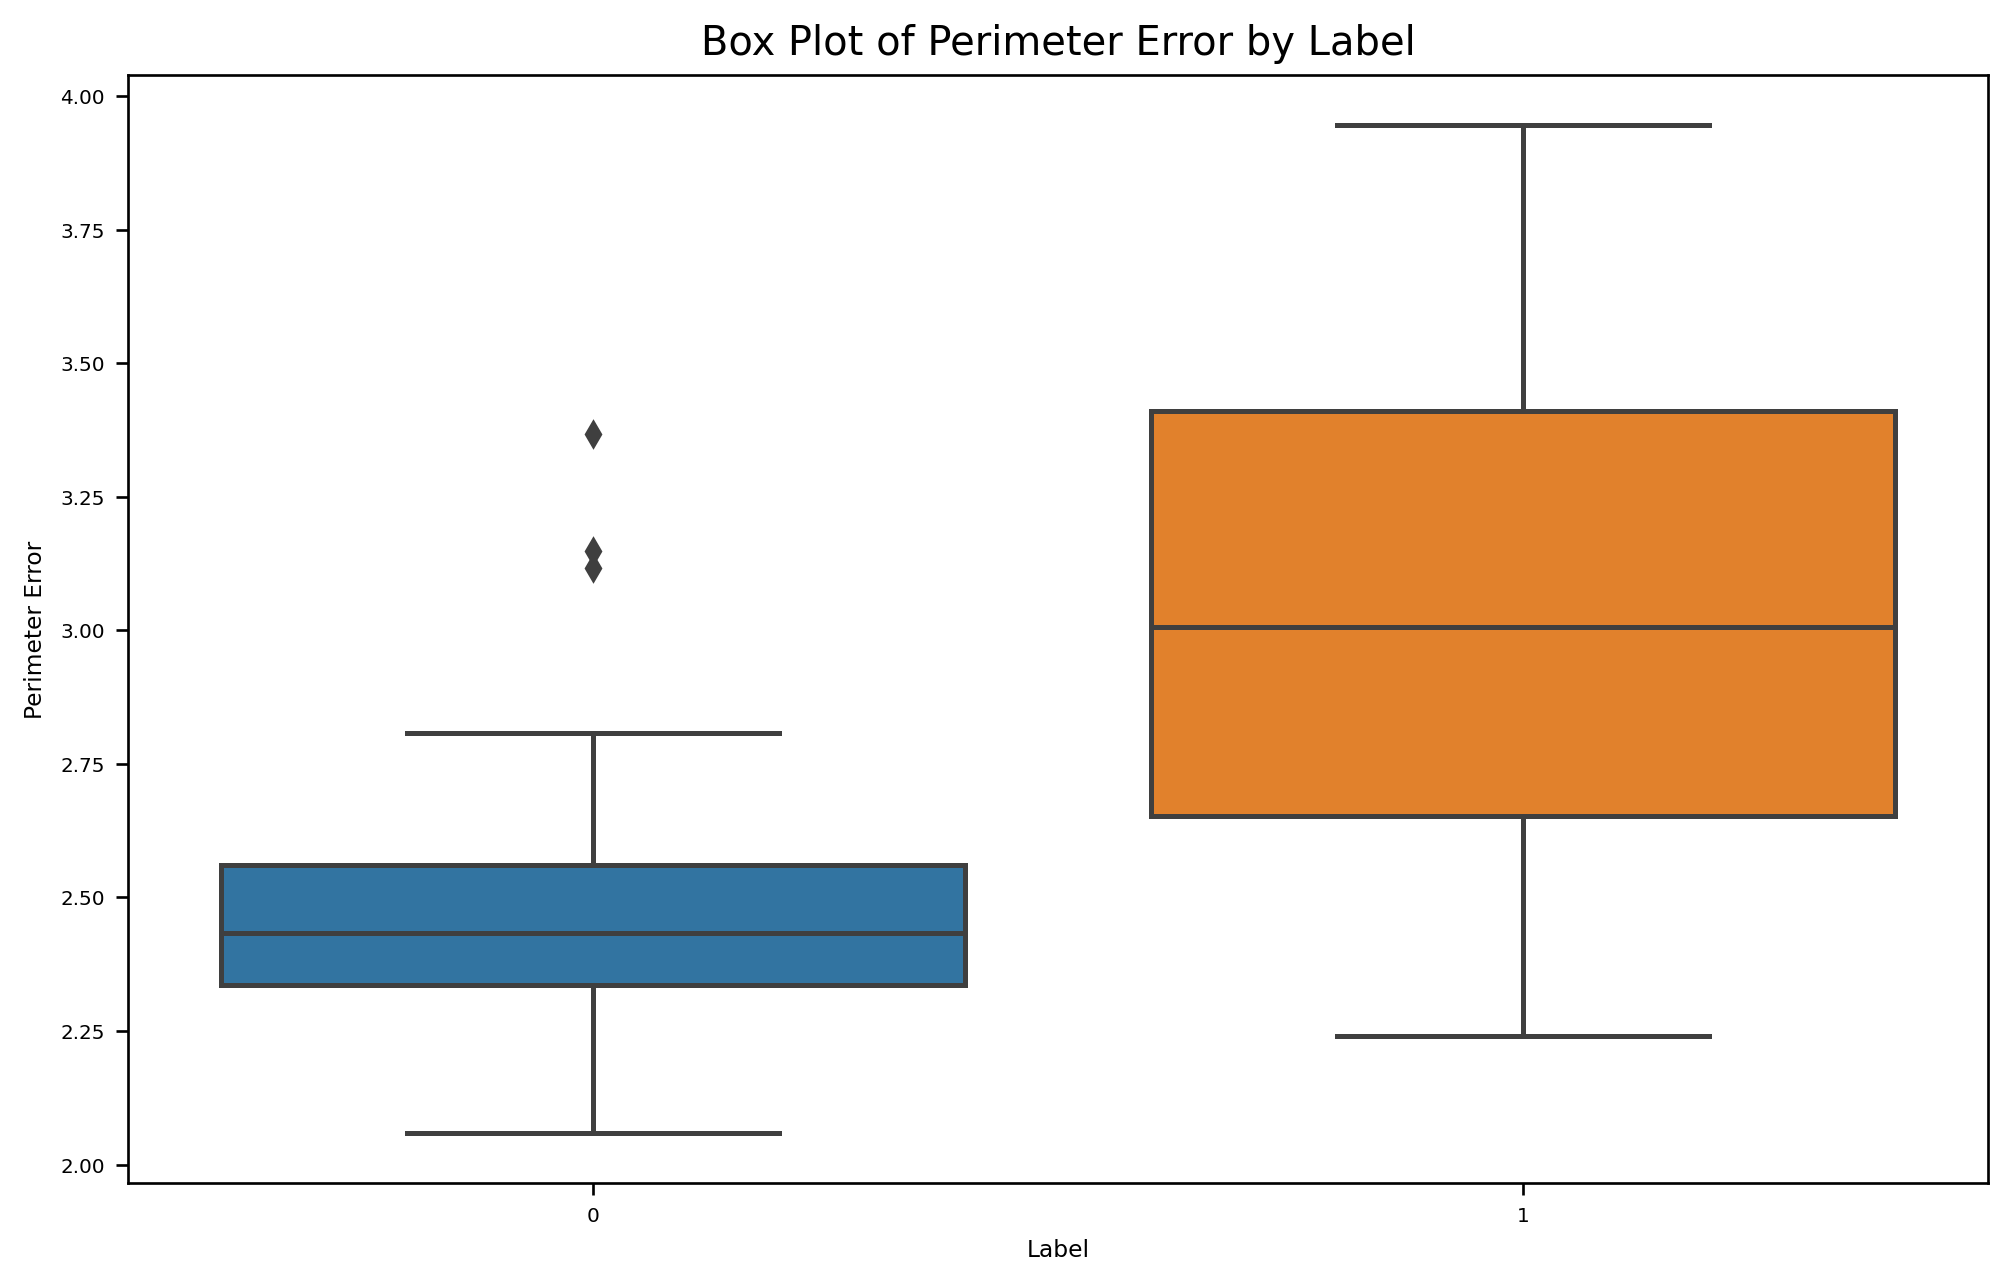

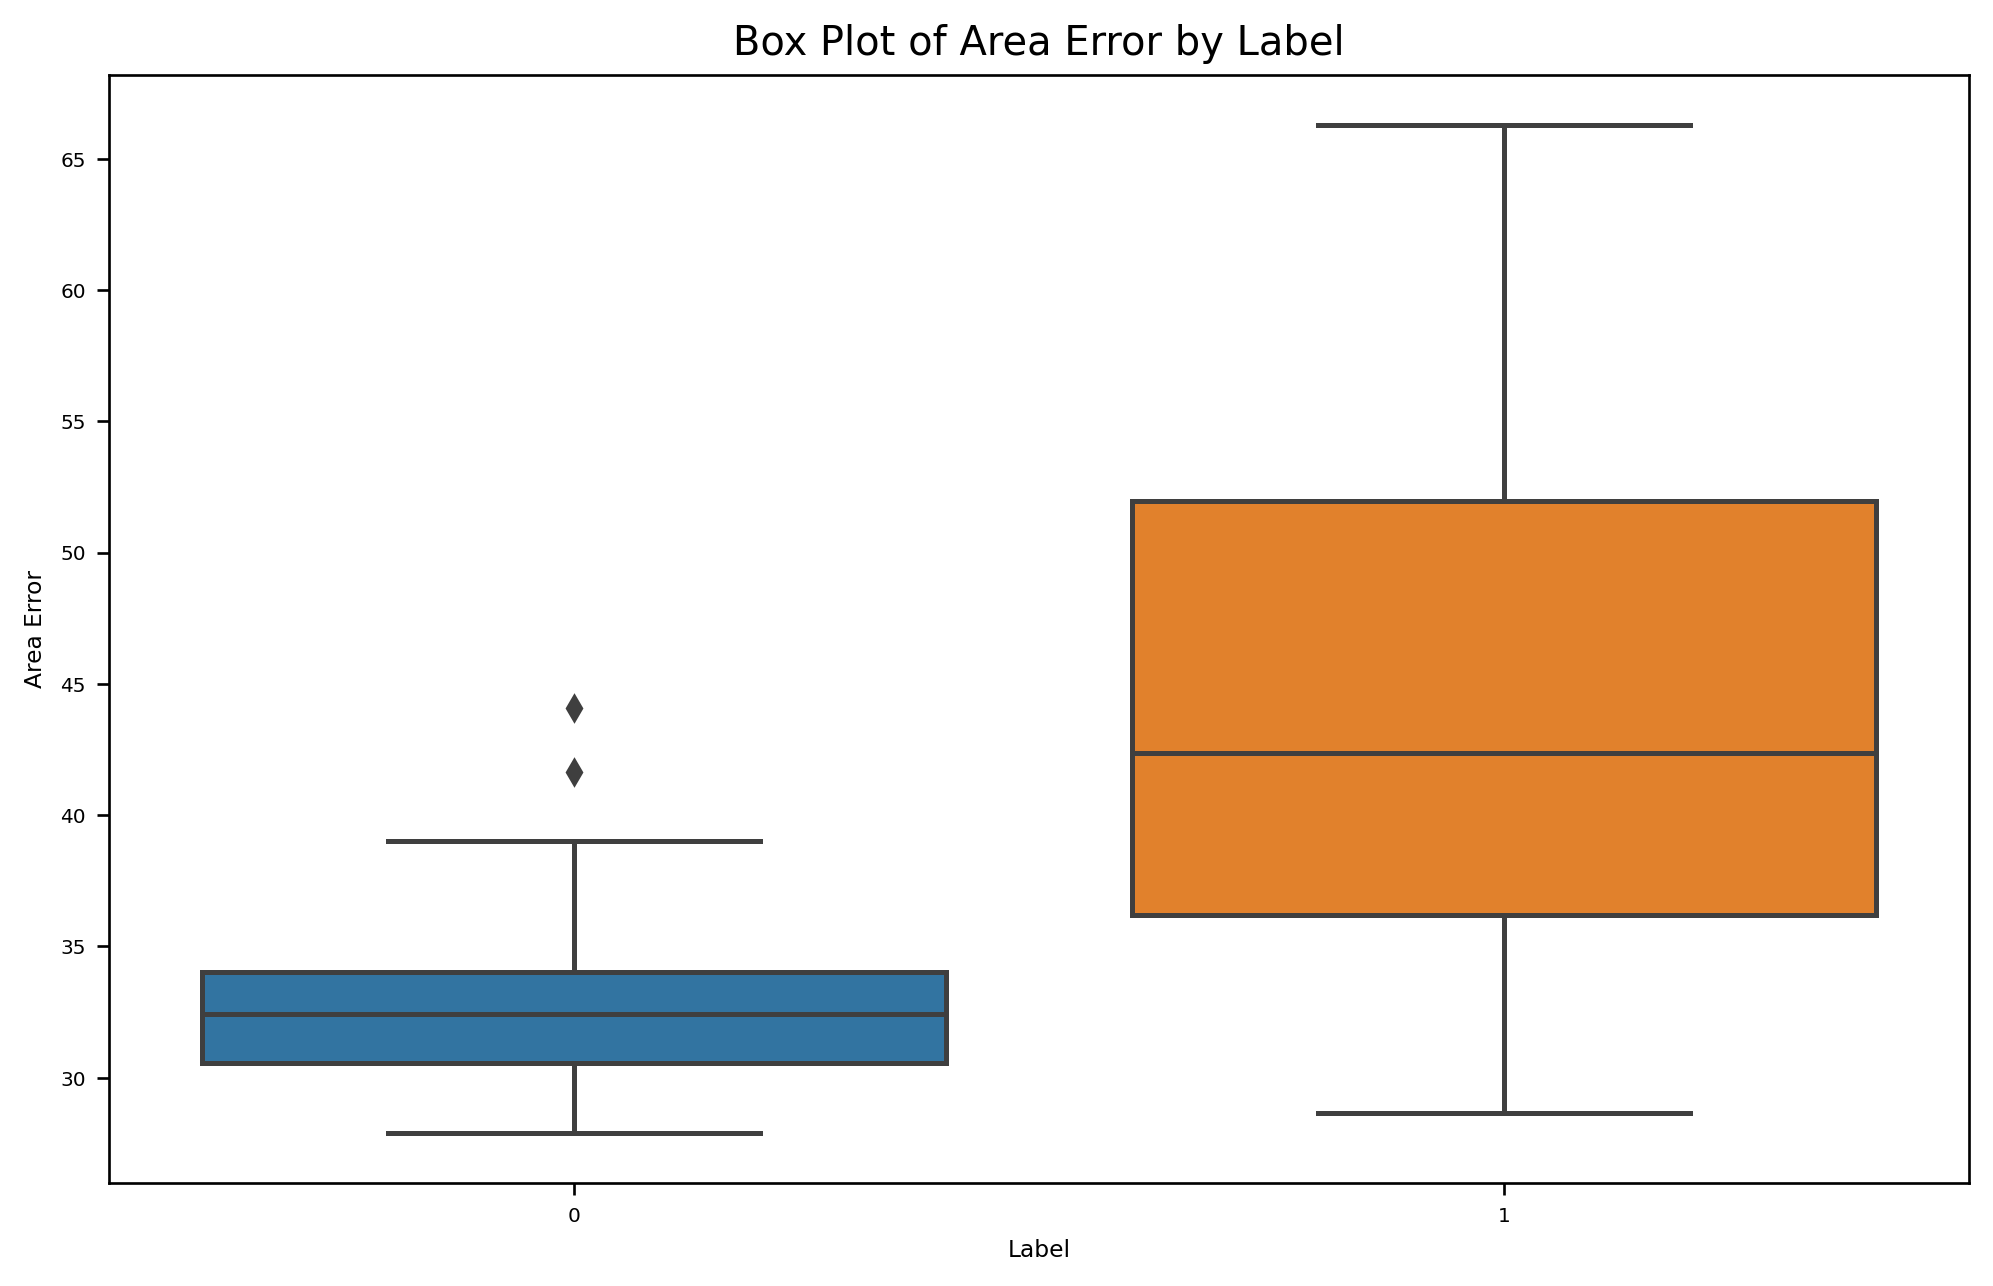

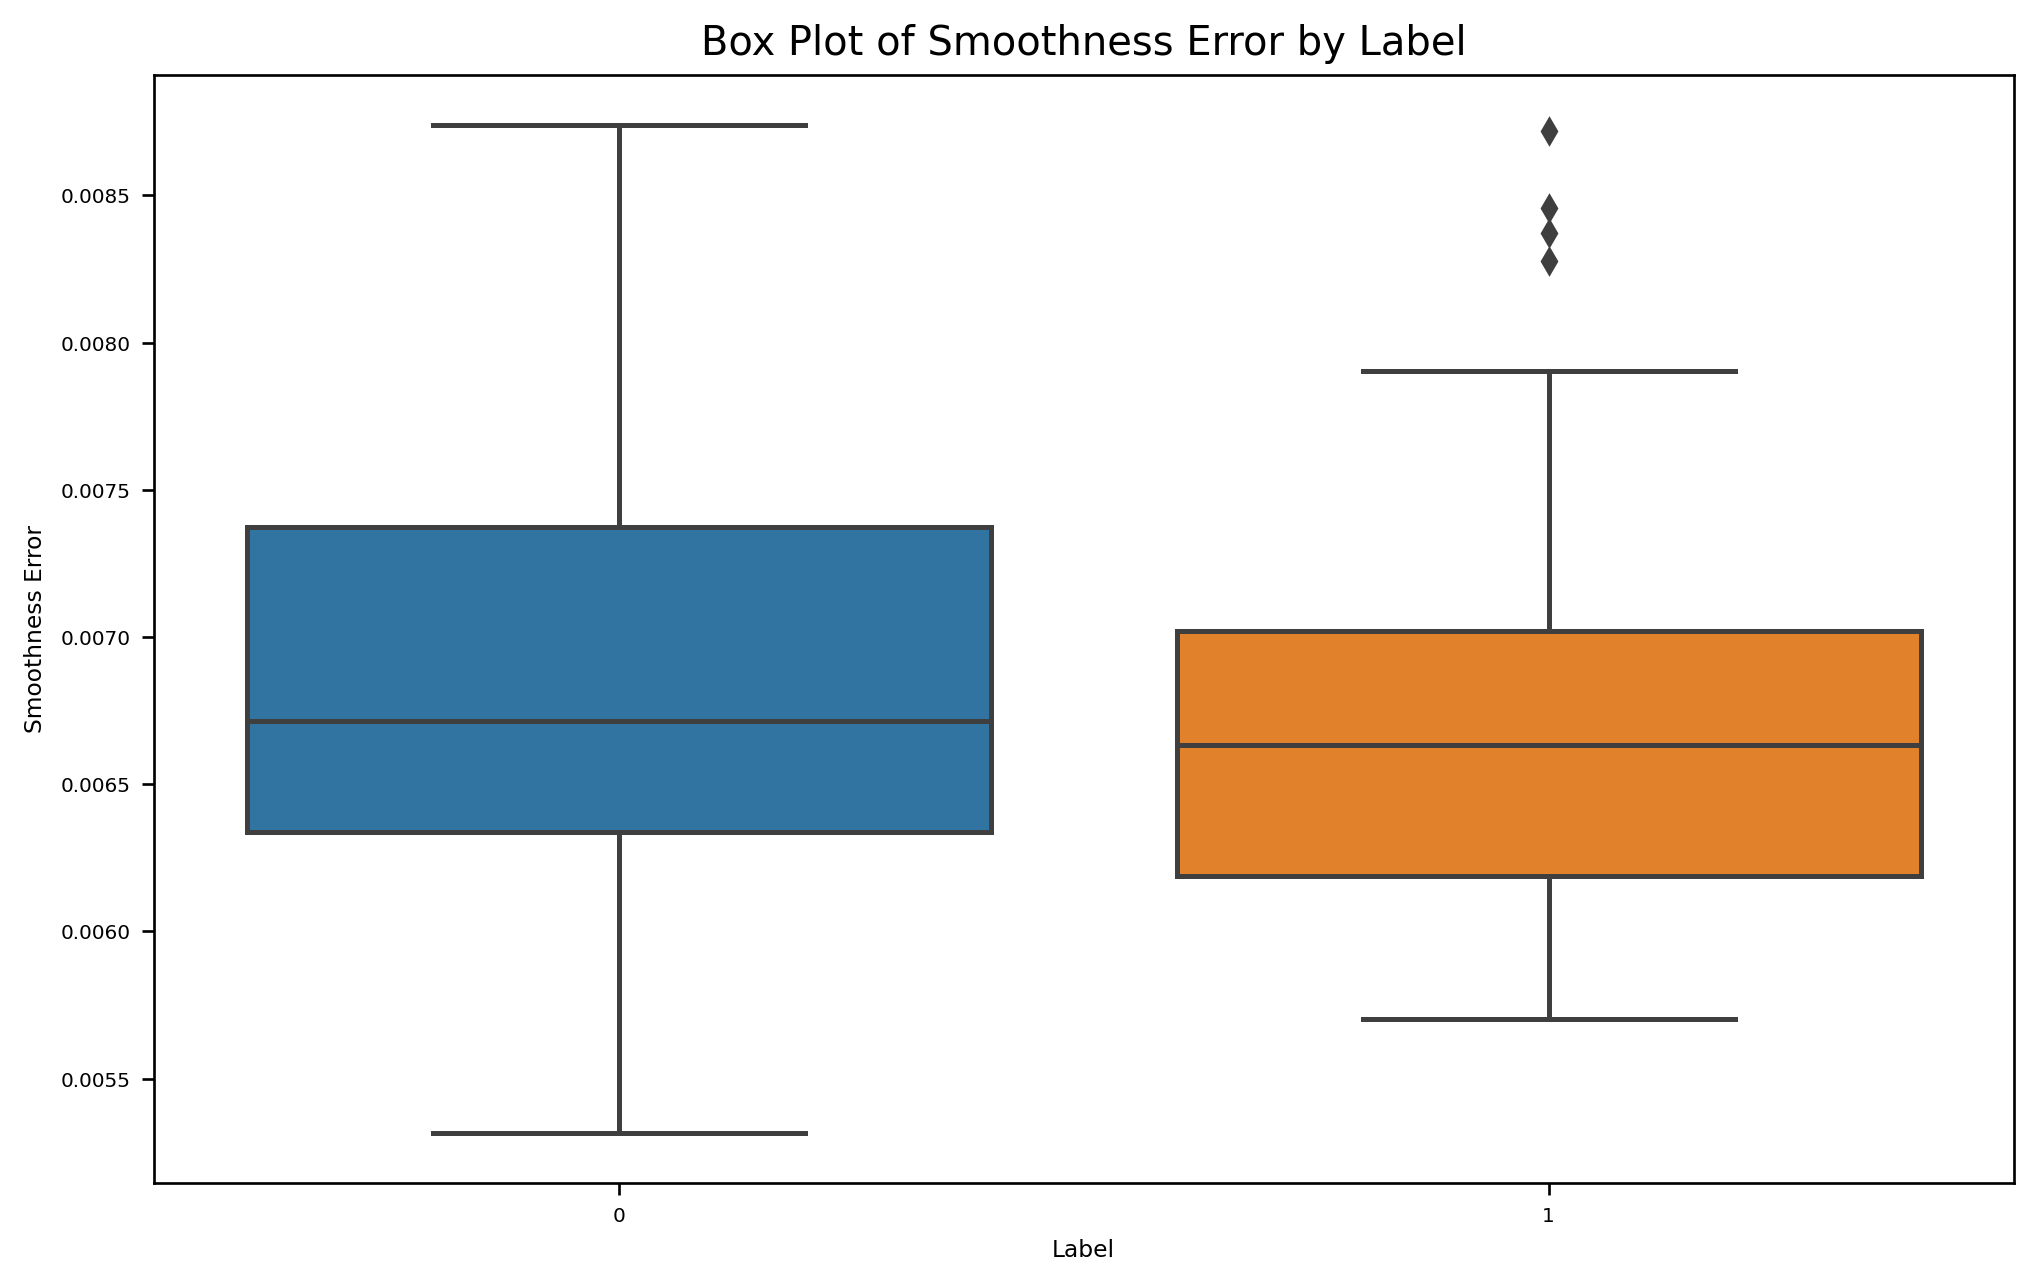

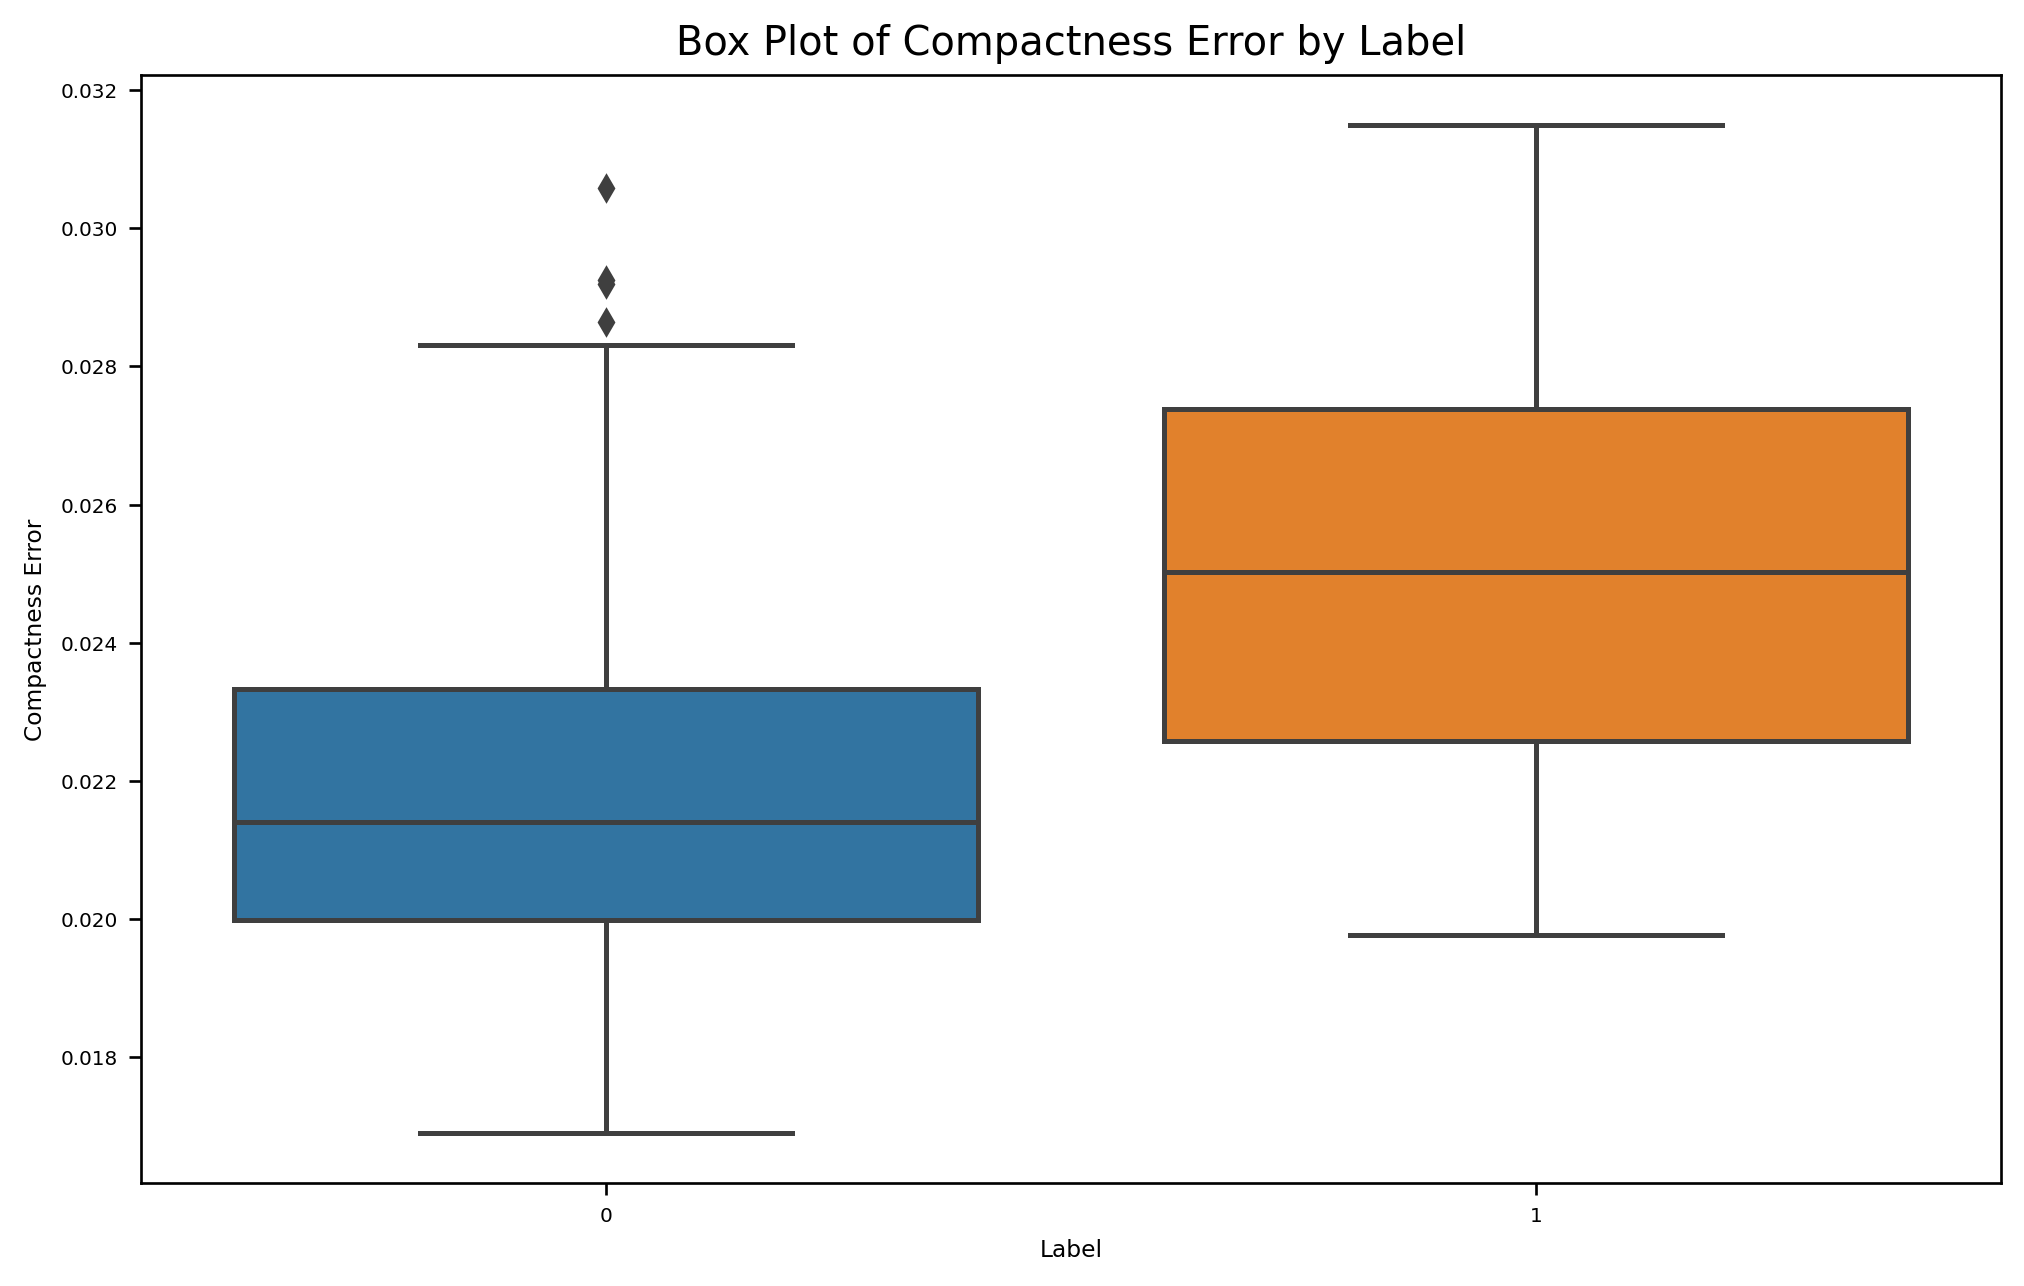

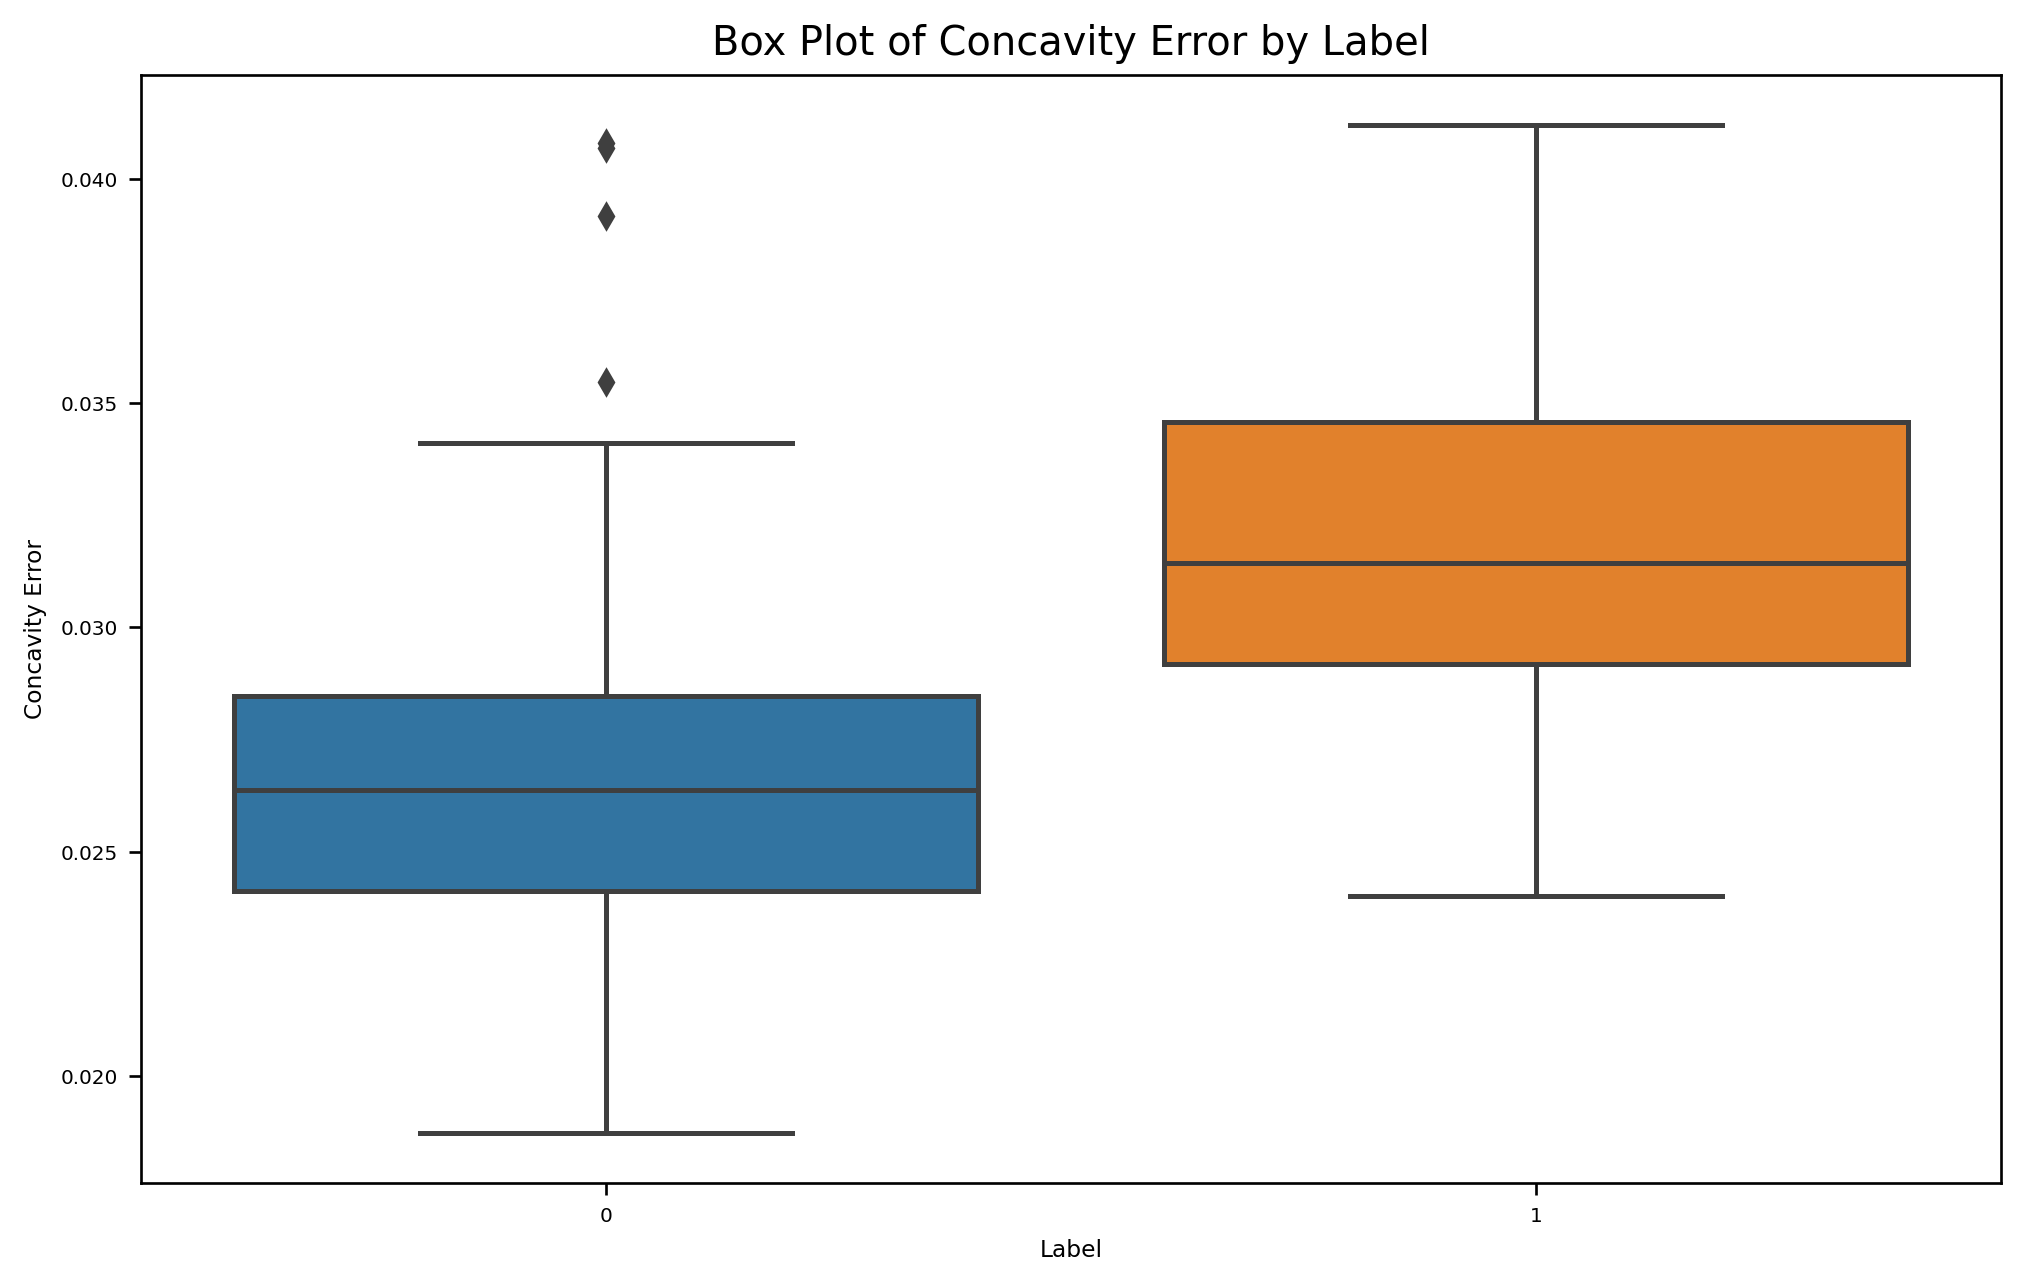

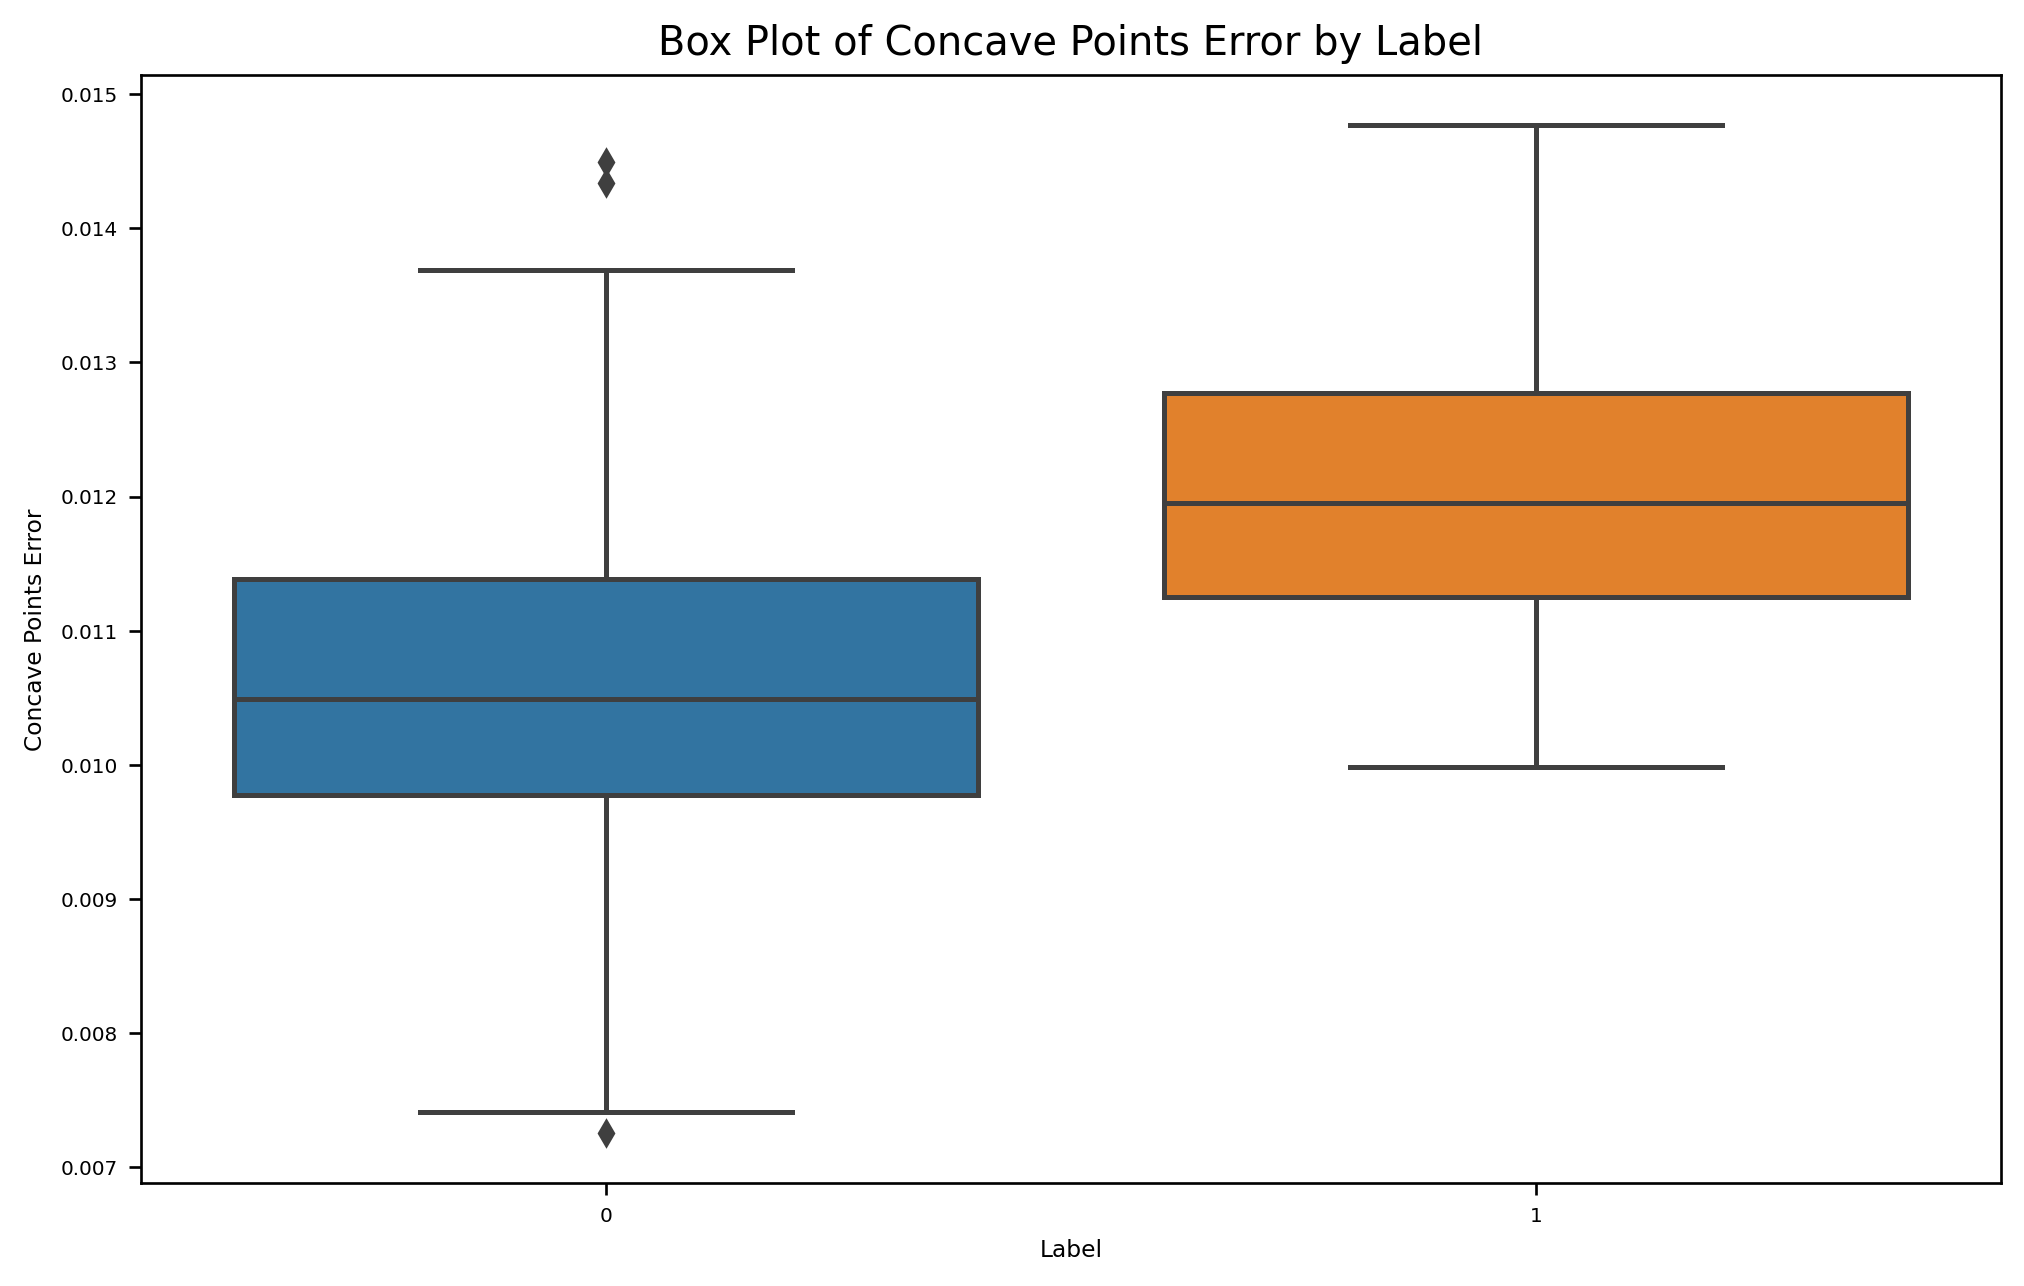

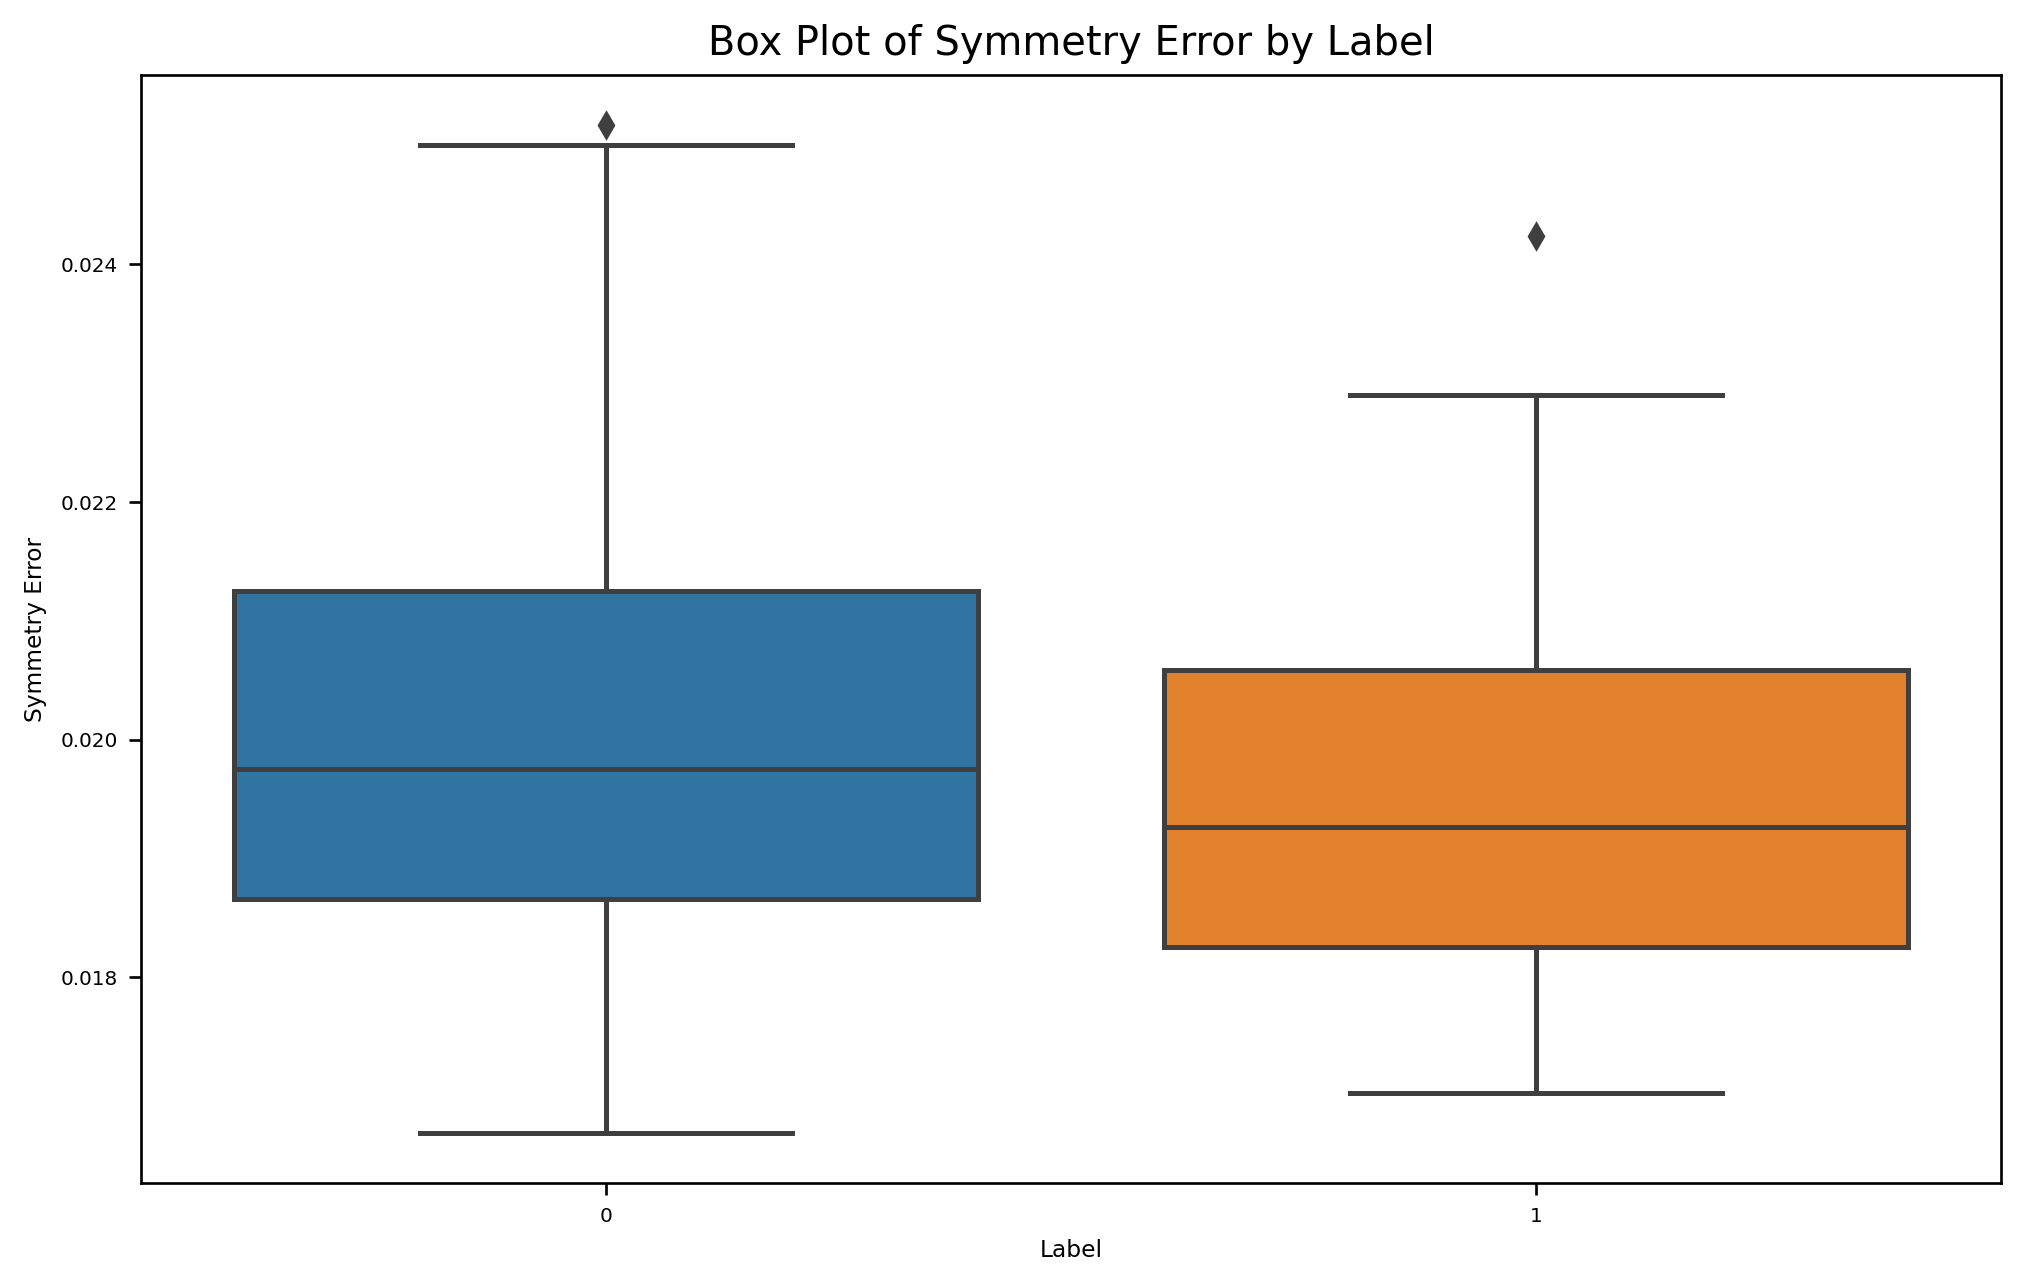

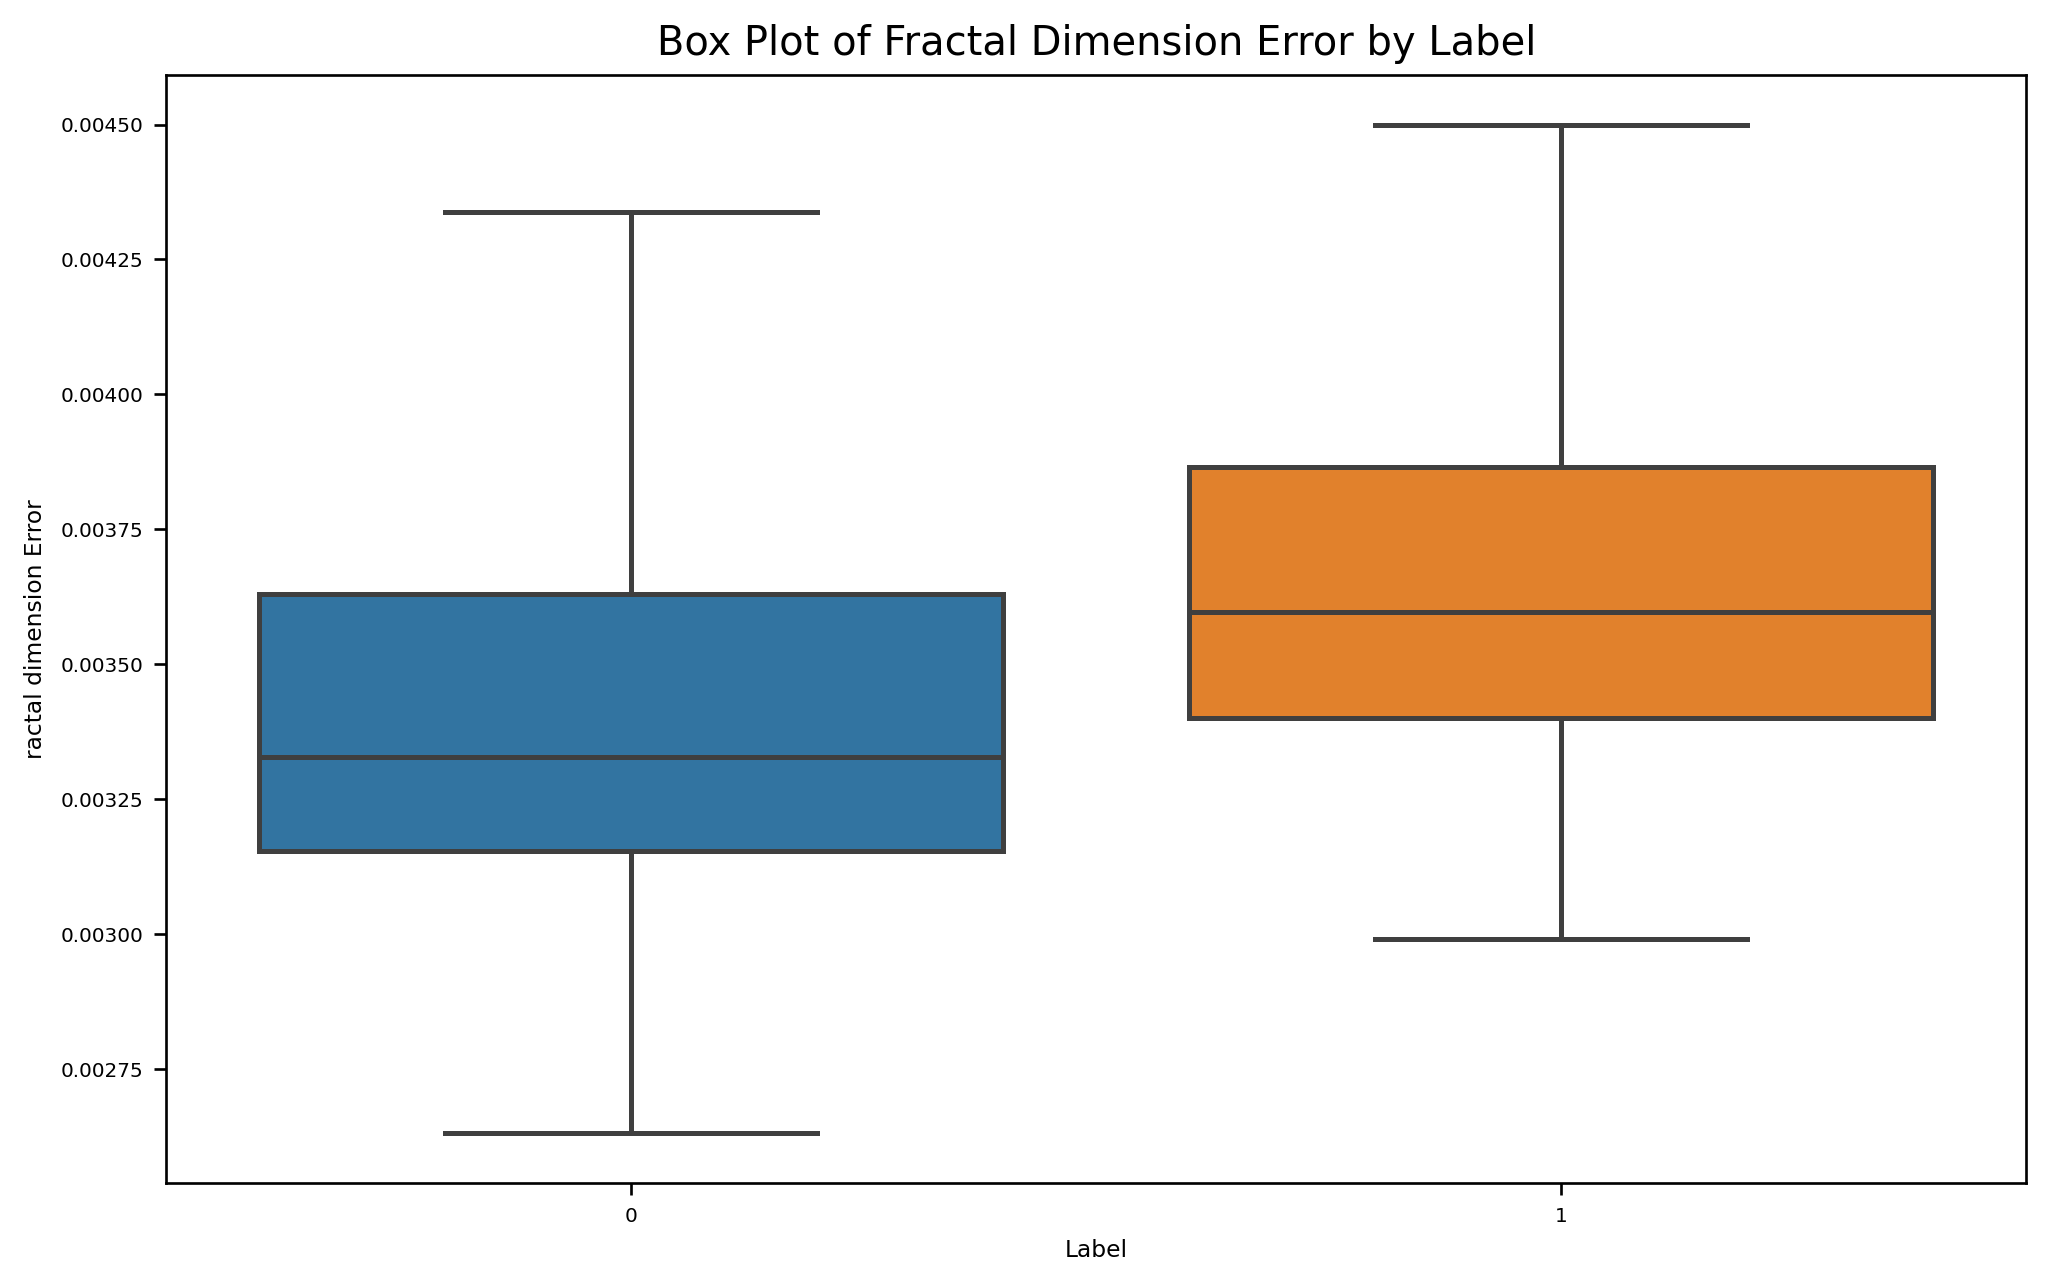

In [751]:
#Creating graphical plots

#mean radius
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='mean radius', data=cancer_df)
plt.title('Box Plot of Mean Radius by Label')
plt.xlabel('Label')
plt.ylabel('Mean Radius')
plt.show()

#mean texture
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='mean texture', data=cancer_df)
plt.title('Box Plot of Mean Texture by Label')
plt.xlabel('Label')
plt.ylabel('Mean Texture')
plt.show()

#mean perimeter
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='mean perimeter', data=cancer_df)
plt.title('Box Plot of Mean Perimeter by Label')
plt.xlabel('Label')
plt.ylabel('Mean Perimeter')
plt.show()

#mean area
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='mean area', data=cancer_df)
plt.title('Box Plot of Mean Area by Label')
plt.xlabel('Label')
plt.ylabel('Mean Area')
plt.show()

#mean smoothness
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='mean smoothness', data=cancer_df)
plt.title('Box Plot of Mean Smoothness by Label')
plt.xlabel('Label')
plt.ylabel('Mean Smoothness')
plt.show()

#mean compactness
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='mean compactness', data=cancer_df)
plt.title('Box Plot of Mean Compactness by Label')
plt.xlabel('Label')
plt.ylabel('Mean Compactness')
plt.show()

#mean concavity
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='mean concavity', data=cancer_df)
plt.title('Box Plot of Mean Concavity by Label')
plt.xlabel('Label')
plt.ylabel('Mean Concavity')
plt.show()

#mean concave points
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='mean concave points', data=cancer_df)
plt.title('Box Plot of Mean Concave Points by Label')
plt.xlabel('Label')
plt.ylabel('Mean Concave Points')
plt.show()

#mean symmetry
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='mean symmetry', data=cancer_df)
plt.title('Box Plot of Mean Symmetry by Label')
plt.xlabel('Label')
plt.ylabel('Mean Symmetry')
plt.show()

#mean fractal dimension
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='mean fractal dimension', data=cancer_df)
plt.title('Box Plot of Mean Fractal Dimension by Label')
plt.xlabel('Label')
plt.ylabel('Mean Fractal Dimension')
plt.show()

#radius error
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='radius error', data=cancer_df)
plt.title('Box Plot of Radius Error by Label')
plt.xlabel('Label')
plt.ylabel('Radius Error')
plt.show()

#texture error
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='texture error', data=cancer_df)
plt.title('Box Plot of Texture Error by Label')
plt.xlabel('Label')
plt.ylabel('Texture Error')
plt.show()

#perimeter error
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='perimeter error', data=cancer_df)
plt.title('Box Plot of Perimeter Error by Label')
plt.xlabel('Label')
plt.ylabel('Perimeter Error')
plt.show()

#area error
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='area error', data=cancer_df)
plt.title('Box Plot of Area Error by Label')
plt.xlabel('Label')
plt.ylabel('Area Error')
plt.show()

#smoothness error
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='smoothness error', data=cancer_df)
plt.title('Box Plot of Smoothness Error by Label')
plt.xlabel('Label')
plt.ylabel('Smoothness Error')
plt.show()

#compactness error
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='compactness error', data=cancer_df)
plt.title('Box Plot of Compactness Error by Label')
plt.xlabel('Label')
plt.ylabel('Compactness Error')
plt.show()

#concavity error
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='concavity error', data=cancer_df)
plt.title('Box Plot of Concavity Error by Label')
plt.xlabel('Label')
plt.ylabel('Concavity Error')
plt.show()

#concave points error
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='concave points error', data=cancer_df)
plt.title('Box Plot of Concave Points Error by Label')
plt.xlabel('Label')
plt.ylabel('Concave Points Error')
plt.show()

#symmetry error
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='symmetry error', data=cancer_df)
plt.title('Box Plot of Symmetry Error by Label')
plt.xlabel('Label')
plt.ylabel('Symmetry Error')
plt.show()

#fractal dimension error
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='fractal dimension error', data=cancer_df)
plt.title('Box Plot of Fractal Dimension Error by Label')
plt.xlabel('Label')
plt.ylabel('ractal dimension Error')
plt.show()

## 2. Prepare data and models, and make baseline measurements [20%]
 - Split data into appropriate sets using the `stratify` option to obtain consistent proportions of classes in each set.
 - Decide on appropriate pre-processing steps for the data.
 - Implement a _very_ simple baseline model that makes purely random predictions of the class.
 - Measure the baseline performance with the following metrics:
   - accuracy
   - balanced accuracy: accounts for imblanaced datasets, defined as _(sensitivity + specificity)/2_
   - recall
   - precision
   - auc
   - f1score
   - fbeta_scores with beta=0.1
   - fbeta_score with beta=10
 - Also display a confusion matrix for the baseline predictions.
 - As a second baseline, implement an SGD classifier and fit it once (without hyper-parameter optimisation) and then display the same performance metrics and a confusion matrix for its results.

In [753]:
# Some helpful code that you can use if you wish (or not)

from sklearn.metrics import fbeta_score, make_scorer

f10_scorer = make_scorer(fbeta_score, beta=10)
f01_scorer = make_scorer(fbeta_score, beta=0.1)

def f10_score(yt,yp):
    return fbeta_score(yt, yp, beta=10)

def f01_score(yt,yp):
    return fbeta_score(yt, yp, beta=0.1)

In [755]:
#Appropriate pre-proprecessing steps for the data
#There are no missing values
#Outliers have been removed
#Erroneous values have been fixed(in mean radius)

from sklearn.impute import SimpleImputer

df_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy = "median")),
    ('std_scaler',StandardScaler())
])


In [757]:
#splitting data into appropriate sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer_df.drop(columns=['label']), cancer_df['label'], test_size=0.2, stratify=cancer_df['label'], random_state=42)
df_pipeline.fit_transform(X_train,y_train)

array([[ 9.78716474e-01, -2.57292440e-04,  1.07193273e+00, ...,
        -2.44918175e-01, -3.75303509e-01,  9.08202810e-01],
       [-9.06228035e-01, -5.47989632e-01, -8.87482557e-01, ...,
        -1.07040069e+00, -8.14513780e-01, -5.38452075e-02],
       [-3.59505301e-01,  1.09764342e+00, -3.51285150e-01, ...,
         6.86739916e-01,  3.88424376e-02,  1.16702722e+00],
       ...,
       [ 6.77410174e-01,  5.85809743e-01,  7.27223424e-01, ...,
         1.41425374e+00, -8.23426259e-01,  1.76781703e+00],
       [-6.87964658e-01, -1.25670719e+00, -6.98368740e-01, ...,
        -7.80715258e-01, -6.01863425e-01, -6.93225159e-01],
       [-4.53717699e-01,  2.59995870e-01, -4.95060741e-01, ...,
        -7.58339561e-01, -5.12665025e-01, -1.28459741e-01]])

In [759]:
#implementing baseline model
np.random.seed(42)
random_pred = np.random.randint(2, size=len(y_test))

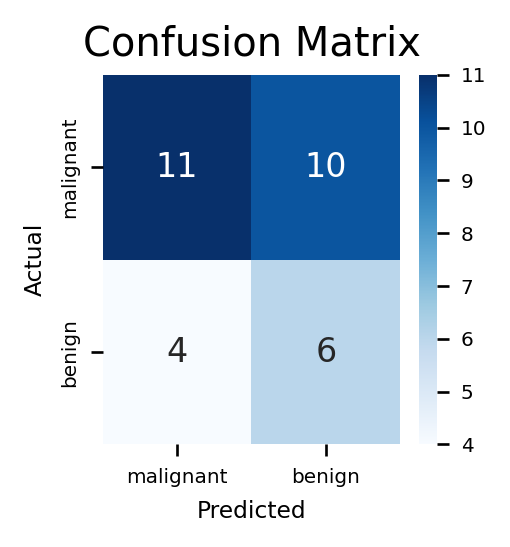

In [761]:
#Confusion matrix for the baseline model
cmat = confusion_matrix(y_true=y_test, y_pred=random_pred)
plt.figure(figsize=(2, 2))
sns.heatmap(cmat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['malignant', 'benign'], 
            yticklabels=['malignant', 'benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [763]:
#Calculating baseline performance
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, balanced_accuracy_score

accuracy = accuracy_score(y_test,random_pred)
precision = precision_score(y_test,random_pred)
recall = recall_score(y_test,random_pred)
auc = roc_auc_score(y_test, random_pred)
balanced_accuracy = balanced_accuracy_score(y_test,random_pred)
base_f1_score = f1_score(y_test,random_pred)
fbeta_0_1 = fbeta_score(y_test, random_pred, beta=0.1)
fbeta_10 = fbeta_score(y_test, random_pred, beta=10)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'AUC: {auc:.2f}')
print(f'Balanced accuracy: {balanced_accuracy:.2f}')
print(f'F1_score: {base_f1_score:.2f}')
print(f'F-beta Score with beta=0.1: {fbeta_0_1:.2f}')
print(f'F-beta Score with beta=0.1: {fbeta_10:.2f}')

Accuracy: 0.55
Precision: 0.38
Recall: 0.60
AUC: 0.56
Balanced accuracy: 0.56
F1_score: 0.46
F-beta Score with beta=0.1: 0.38
F-beta Score with beta=0.1: 0.60


In [765]:
#implementing and SGD classifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

sgd_pipeline = Pipeline([ 
    ('std_scaler',StandardScaler()), 
    ('sgd',SGDClassifier()) 
])

sgd_pipeline.fit(X_train,y_train)
sgd_train_pred = sgd_pipeline.predict(X_train)
sgd_test_pred = sgd_pipeline.predict(X_test)

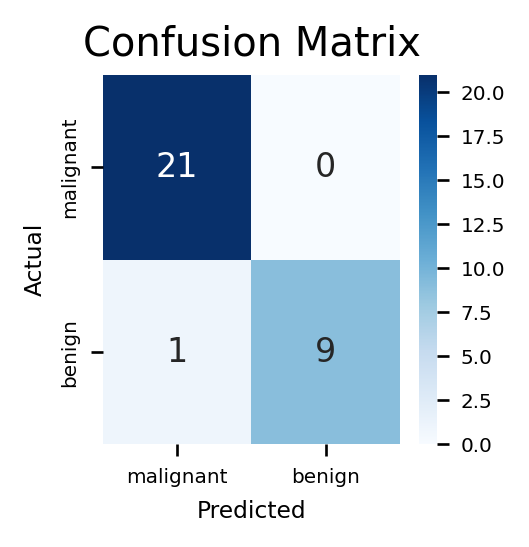

In [767]:
#Confusion matrix for the baseline SGD model
cmat2 = confusion_matrix(y_true=y_test, y_pred=sgd_test_pred)
plt.figure(figsize=(2, 2))
sns.heatmap(cmat2, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['malignant', 'benign'], 
            yticklabels=['malignant', 'benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [769]:
#Calculating baseline performance for SGD model

sgd_accuracy = accuracy_score(y_test,sgd_test_pred)
sgd_precision = precision_score(y_test,sgd_test_pred)
sgd_recall = recall_score(y_test,sgd_test_pred)
sgd_auc = roc_auc_score(y_test, sgd_test_pred)
sgd_balanced_accuracy = balanced_accuracy_score(y_test,sgd_test_pred)
sgd_f1_score = f1_score(y_test, sgd_test_pred)
sgd_fbeta_0_1 = fbeta_score(y_test, sgd_test_pred, beta=0.1)
sgd_fbeta_10 = fbeta_score(y_test, sgd_test_pred, beta=10)

print(f'Accuracy: {sgd_accuracy:.2f}')
print(f'Precision: {sgd_precision:.2f}')
print(f'Recall: {sgd_recall:.2f}')
print(f'AUC: {sgd_auc:.2f}')
print(f'Balanced accuracy: {sgd_balanced_accuracy:.2f}')
print(f'F1_score: {sgd_f1_score:.2f}')
print(f'F-beta Score with beta=0.1: {sgd_fbeta_0_1:.2f}')
print(f'F-beta Score with beta=0.1: {sgd_fbeta_10:.2f}')

Accuracy: 0.97
Precision: 1.00
Recall: 0.90
AUC: 0.95
Balanced accuracy: 0.95
F1_score: 0.95
F-beta Score with beta=0.1: 1.00
F-beta Score with beta=0.1: 0.90


## 3. Model Optimisation [40%]

### 3.1 Performance metric
Choose one performance metric from the above set. State your choice and explain why you chose it. [50 words maximum]

In [579]:
""" I choose F1 score , because when considering critical cases like predicting malignant cases, both false positives and false 
negatives should also be considered. This metric provides a balance between precision and recall. """

### 3.2 Hyper-parameter optimisation
 - Perform a hyper-parameter optimisation (using appropriate methods) on three models:
   - SGD Classifer
   - SVM
   - One other model of your choice
 - Display the results of each model (including confusion matrices) and choose the best model.
 - Choose the best model and display the final results of this model.

Accuracy: 0.97
Precision: 1.00
Recall: 0.90
AUC: 0.95
Balanced accuracy: 0.95
F1_score: 0.95
F-beta Score with beta=0.1: 1.00
F-beta Score with beta=0.1: 0.90
Best parameters for SGD Classifier:
{'sgd__alpha': 0.0001, 'sgd__loss': 'modified_huber', 'sgd__penalty': 'l2'}
Best cross-validation accuracy for SGD Classifier:
0.984


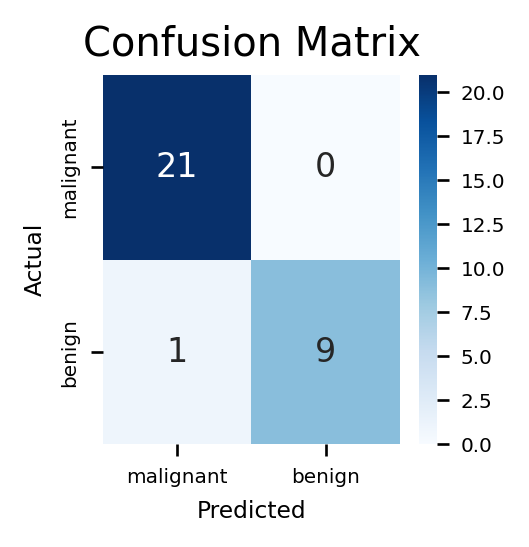

In [771]:
# SGD classifier
param_grid_sgd = {
    'sgd__loss': ['hinge', 'log_loss', 'modified_huber'],
    'sgd__alpha': [0.0001, 0.001, 0.01],
    'sgd__penalty': ['l2', 'l1', 'elasticnet']
}

sgd_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('sgd', SGDClassifier(random_state=42))
])

grid_search_sgd = GridSearchCV(sgd_pipeline, param_grid_sgd, cv=5, scoring='accuracy')

grid_search_sgd.fit(X_train, y_train)
sgd_y_pred = grid_search_sgd.predict(X_test)

accuracy_sgd = accuracy_score(y_test,sgd_y_pred)
precision_sgd = precision_score(y_test,sgd_y_pred)
recall_sgd = recall_score(y_test,sgd_y_pred)
auc_sgd = roc_auc_score(y_test, sgd_y_pred)
balanced_accuracy_sgd = balanced_accuracy_score(y_test,sgd_y_pred)
f1_score_sgd = f1_score(y_test, sgd_y_pred)
fbeta_0_1_sgd = fbeta_score(y_test, sgd_y_pred, beta=0.1)
fbeta_10_sgd = fbeta_score(y_test, sgd_y_pred, beta=10)

#results
print(f'Accuracy: {accuracy_sgd:.2f}')
print(f'Precision: {precision_sgd:.2f}')
print(f'Recall: {recall_sgd:.2f}')
print(f'AUC: {auc_sgd:.2f}')
print(f'Balanced accuracy: {balanced_accuracy_sgd:.2f}')
print(f'F1_score: {f1_score_sgd:.2f}')
print(f'F-beta Score with beta=0.1: {fbeta_0_1_sgd:.2f}')
print(f'F-beta Score with beta=0.1: {fbeta_10_sgd:.2f}')
print("Best parameters for SGD Classifier:")
print(grid_search_sgd.best_params_)
print("Best cross-validation accuracy for SGD Classifier:")
print(grid_search_sgd.best_score_)

#confusion matrix
sgd_conf_matrix = confusion_matrix(y_test, sgd_y_pred)
plt.figure(figsize=(2, 2))
sns.heatmap(sgd_conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['malignant', 'benign'], 
            yticklabels=['malignant', 'benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.94
Precision: 1.00
Recall: 0.80
AUC: 0.90
Balanced accuracy: 0.90
F1_score: 0.89
F-beta Score with beta=0.1: 1.00
F-beta Score with beta=0.1: 0.80
Best parameters for SVM:
{'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Best cross-validation accuracy for SVM:
0.96


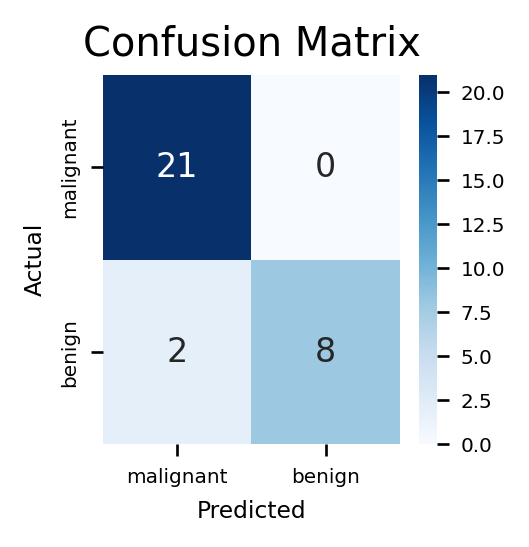

In [773]:
# SVM
from sklearn.svm import SVC

param_grid_svm = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto']
}

svm_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('svm', SVC(random_state=42))
])

grid_search_svm = GridSearchCV(svm_pipeline, param_grid_svm, cv=5, scoring='accuracy')

grid_search_svm.fit(X_train, y_train)
svm_y_pred = grid_search_svm.predict(X_test)

accuracy_svm = accuracy_score(y_test,svm_y_pred)
precision_svm = precision_score(y_test,svm_y_pred)
recall_svm = recall_score(y_test,svm_y_pred)
auc_svm = roc_auc_score(y_test, svm_y_pred)
balanced_accuracy_svm = balanced_accuracy_score(y_test,svm_y_pred)
f1_score_svm = f1_score(y_test, svm_y_pred)
fbeta_0_1_svm = fbeta_score(y_test, svm_y_pred, beta=0.1)
fbeta_10_svm= fbeta_score(y_test, svm_y_pred, beta=10)

#results
print(f'Accuracy: {accuracy_svm:.2f}')
print(f'Precision: {precision_svm:.2f}')
print(f'Recall: {recall_svm:.2f}')
print(f'AUC: {auc_svm:.2f}')
print(f'Balanced accuracy: {balanced_accuracy_svm:.2f}')
print(f'F1_score: {f1_score_svm:.2f}')
print(f'F-beta Score with beta=0.1: {fbeta_0_1_svm:.2f}')
print(f'F-beta Score with beta=0.1: {fbeta_10_svm:.2f}')
print("Best parameters for SVM:")
print(grid_search_svm.best_params_)
print("Best cross-validation accuracy for SVM:")
print(grid_search_svm.best_score_)



svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)
plt.figure(figsize=(2, 2))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['malignant', 'benign'], 
            yticklabels=['malignant', 'benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

/Users/riyasebastian/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/riyasebastian/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/riyasebastian/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/riyasebastian/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/riyasebastian/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/riyasebastian/anac

Accuracy: 0.97
Precision: 1.00
Recall: 0.90
AUC: 0.95
Balanced accuracy: 0.95
F1_score: 0.95
F-beta Score with beta=0.1: 1.00
F-beta Score with beta=0.1: 0.90
Best parameters for Logistic Regression:
{'logreg__C': 1, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
Best cross-validation accuracy for Logistic Regression:
0.976


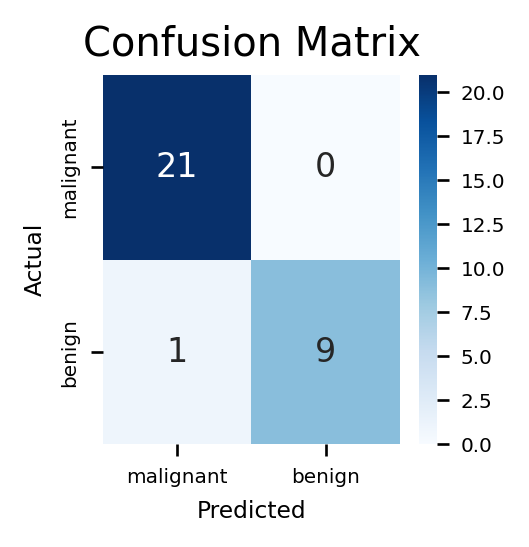

In [775]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

param_grid_logreg = {
    'logreg__C': [0.1, 1, 10, 100],
    'logreg__penalty': ['l2', 'l1'],
    'logreg__solver': ['liblinear', 'saga']
}

logreg_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42))
])

grid_search_logreg = GridSearchCV(logreg_pipeline, param_grid_logreg, cv=5, scoring='accuracy')

grid_search_logreg.fit(X_train, y_train)
logreg_y_pred = grid_search_logreg.predict(X_test)

accuracy_logreg = accuracy_score(y_test,logreg_y_pred)
precision_logreg = precision_score(y_test,logreg_y_pred)
recall_logreg = recall_score(y_test,logreg_y_pred)
auc_logreg = roc_auc_score(y_test, logreg_y_pred)
balanced_accuracy_logreg = balanced_accuracy_score(y_test,logreg_y_pred)
f1_score_logreg = f1_score(y_test, logreg_y_pred)
fbeta_0_1_logreg = fbeta_score(y_test, logreg_y_pred, beta=0.1)
fbeta_10_logreg = fbeta_score(y_test, logreg_y_pred, beta=10)

#results
print(f'Accuracy: {accuracy_logreg:.2f}')
print(f'Precision: {precision_logreg:.2f}')
print(f'Recall: {recall_logreg:.2f}')
print(f'AUC: {auc_logreg:.2f}')
print(f'Balanced accuracy: {balanced_accuracy_logreg:.2f}')
print(f'F1_score: {f1_score_logreg:.2f}')
print(f'F-beta Score with beta=0.1: {fbeta_0_1_logreg:.2f}')
print(f'F-beta Score with beta=0.1: {fbeta_10_logreg:.2f}')
print("Best parameters for Logistic Regression:")
print(grid_search_logreg.best_params_)
print("Best cross-validation accuracy for Logistic Regression:")
print(grid_search_logreg.best_score_)



logreg_conf_matrix = confusion_matrix(y_test, logreg_y_pred)
plt.figure(figsize=(2, 2))
sns.heatmap(logreg_conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['malignant', 'benign'], 
            yticklabels=['malignant', 'benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.97
Precision: 1.00
Recall: 0.90
AUC: 0.95
Balanced accuracy: 0.95
F1_score: 0.95
F-beta Score with beta=0.1: 1.00
F-beta Score with beta=0.1: 0.90
Best parameters for SGD Classifier:
{'sgd__alpha': 0.0001, 'sgd__loss': 'modified_huber', 'sgd__penalty': 'l2'}
Best cross-validation accuracy for SGD Classifier:
0.984
False positive rate: 0.10


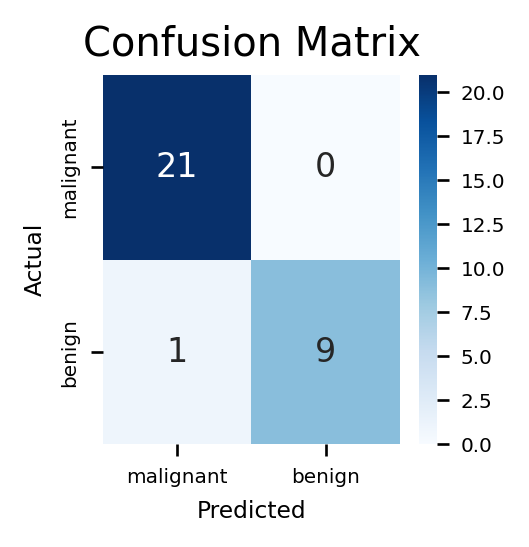

In [914]:
# The best model
"""Based on the metrics calculated, SGD classifier and logistic regression have the same efficiency.
But since computational efficiency is very critical as this is a model to detect malignant cases in cancer patients,
SGD classidier can be the best model."""
#The results for SGD classification:
print(f'Accuracy: {accuracy_sgd:.2f}')
print(f'Precision: {precision_sgd:.2f}')
print(f'Recall: {recall_sgd:.2f}')
print(f'AUC: {auc_sgd:.2f}')
print(f'Balanced accuracy: {balanced_accuracy_sgd:.2f}')
print(f'F1_score: {f1_score_sgd:.2f}')
print(f'F-beta Score with beta=0.1: {fbeta_0_1_sgd:.2f}')
print(f'F-beta Score with beta=0.1: {fbeta_10_sgd:.2f}')
print("Best parameters for SGD Classifier:")
print(grid_search_sgd.best_params_)
print("Best cross-validation accuracy for SGD Classifier:")
print(grid_search_sgd.best_score_)

sgd_conf_matrix = confusion_matrix(y_test, sgd_y_pred)
sgd_TN = sgd_conf_matrix[1, 1]
sgd_FP = sgd_conf_matrix[1, 0]
sgd_FPR = sgd_FP / (sgd_FP + sgd_TN)
print(f'False positive rate: {sgd_FPR:.2f}')
plt.figure(figsize=(2, 2))
sns.heatmap(sgd_conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['malignant', 'benign'], 
            yticklabels=['malignant', 'benign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 3.3 Final results

From the final results calculate the _probability_ that a sample from a person with a malignant tumour is given a result that they do not have cancer.

In [779]:
sgd_conf_matrix = confusion_matrix(y_test, sgd_y_pred)
sgd_TN = sgd_conf_matrix[0, 0]
sgd_FP = sgd_conf_matrix[0, 1]
sgd_FN = sgd_conf_matrix[1, 0]
sgd_TP = sgd_conf_matrix[1, 1]

FNR = sgd_FN / (sgd_TP + sgd_FN)
print("Probability that a sample from a person with a malignant tumour is given a result that they do not have cancer is ",
      FNR)

Probability that a sample from a person with a malignant tumour is given a result that they do not have cancer is  0.1


## 4. Decision Boundaries [10%]
 - To finish up, the client wants a visualisation of how the final model is working and your line manager has asked you to show some of the decision boundaries.
 - The client also wants to know if your method has met their performance specifications.
 - Follow the next three steps (4.1, 4.2 and 4.3) to do these things.

### 4.1 Discriminative features

Although it is only possible to know the true usefulness of a feature when you've combined it with others in a machine learning method, it is still helpful to have some measure for how discriminative each feature is on its own.  One common method for doing this is to calculate a T-score (often used in statistics, and in the LDA machine learning method) for each feature.  

The formula for the T-score is:

_(mean(x2) - mean(x1))/(0.5*(stddev(x2) + stddev(x1)))_

where x1 and x2 are the feature values corresponding to the two classes. Large values for the T-score (either positive or negative) indicate discriminative ability.

**Calculate the T-score for each feature and print out the best 4 features according to this score.**

In [872]:
malignant = cancer_df[cancer_df['label'] == 1]
benign = cancer_df[cancer_df['label'] == 0]

t_scores = {}
for column in cancer_df.columns[1:]:
    mean_x1 = malignant[column].mean()
    mean_x2 = benign[column].mean()
    stddev_x1 = malignant[column].std()
    stddev_x2 = benign[column].std()
    t_score = (mean_x2 - mean_x1) / (0.5 * (stddev_x2 + stddev_x1))
    t_scores[column] = abs(t_score)

best_feature = sorted(t_scores.items(), key = lambda item: item[1], reverse = True)[:4]
print("Best 4 features are: ")
for column, score in  best_feature:
    print(f"{column} T-score: {score}")

Best 4 features are: 
mean concave points T-score: 2.8360894872315856
mean concavity T-score: 2.6875857966973777
mean compactness T-score: 1.9211287643116113
mean perimeter T-score: 1.893382135880504


### 4.2 Visualise decision boundaries

**Display the decision boundaries** for each pair of features from the best 4 chosen above.  You can use the functions below to help if you like.

Instead of using the simple mean as the input for `xmean` in `plot_contours`, use the following:

_0.5*(mean(x1) + mean(x2))_

where x1 and x2 are the data associated with the two classes.  This way of calculating a "mean" point takes into account any imbalance between the classes.

In [874]:
def make_meshgrid(x, y, ns=100):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on (only min and max used)
    y: data to base y-axis meshgrid on (only min and max used)
    ns: number of steps in grid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min(), x.max()
    y_min, y_max = y.min(), y.max()
    hx = (x_max - x_min)/ns
    hy = (y_max - y_min)/ns
    xx, yy = np.meshgrid(np.arange(x_min, x_max + hx, hx), np.arange(y_min, y_max + hy, hy))
    return xx, yy

In [876]:
def plot_contours(clf, xx, yy, xmean, n1, n2, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    xmean : 1d array of N mean values (used to populate constant features with)
    n1, n2: index numbers of features that change
              that is, which features xx and yy represent, from the set of N features
    params: dictionary of params to pass to contourf, optional
    """
    # The following lines makes an MxN matrix to pass to the classifier (# samples x # features)
    # It does this by multiplying Mx1 and 1xN matrices, where the former is filled with 1's
    #  where M is the number of grid points in xx and N is the number of features in xmean
    #  It is done in such a way that the xmean vector is replaced in each row
    fullx = np.ones((xx.ravel().shape[0],1)) * np.reshape(xmean,(1,-1))
    fullx[:,n1] = xx.ravel()
    fullx[:,n2] = yy.ravel()
    Z = clf.predict(fullx)
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

/Users/riyasebastian/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


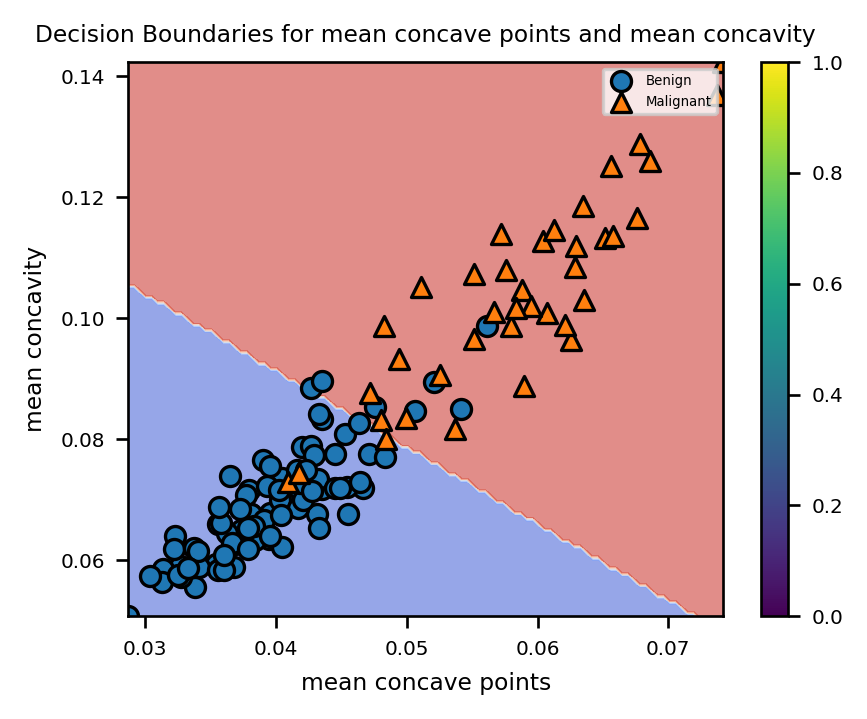

/Users/riyasebastian/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


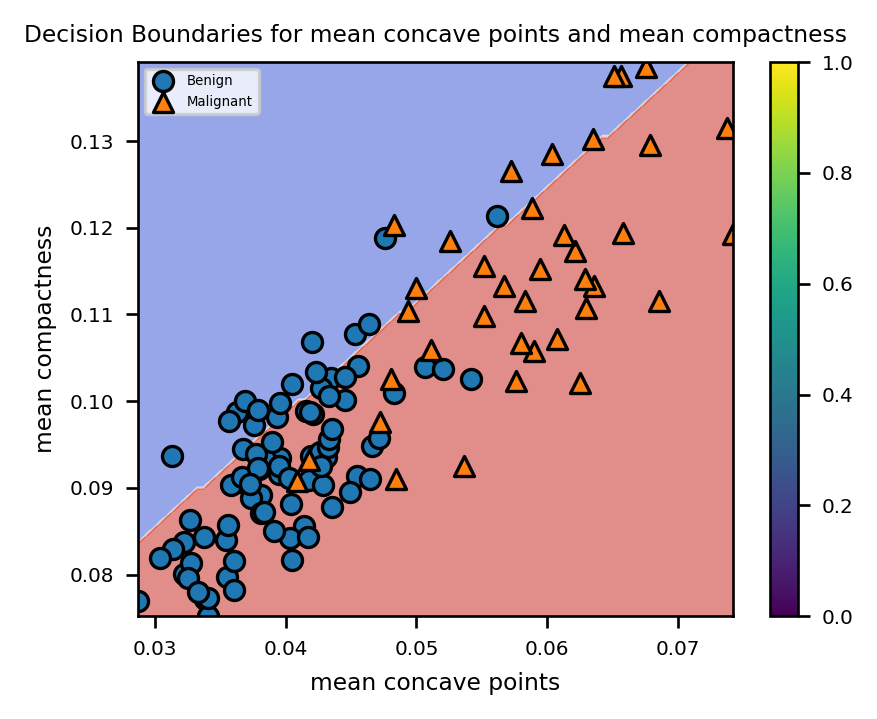

/Users/riyasebastian/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


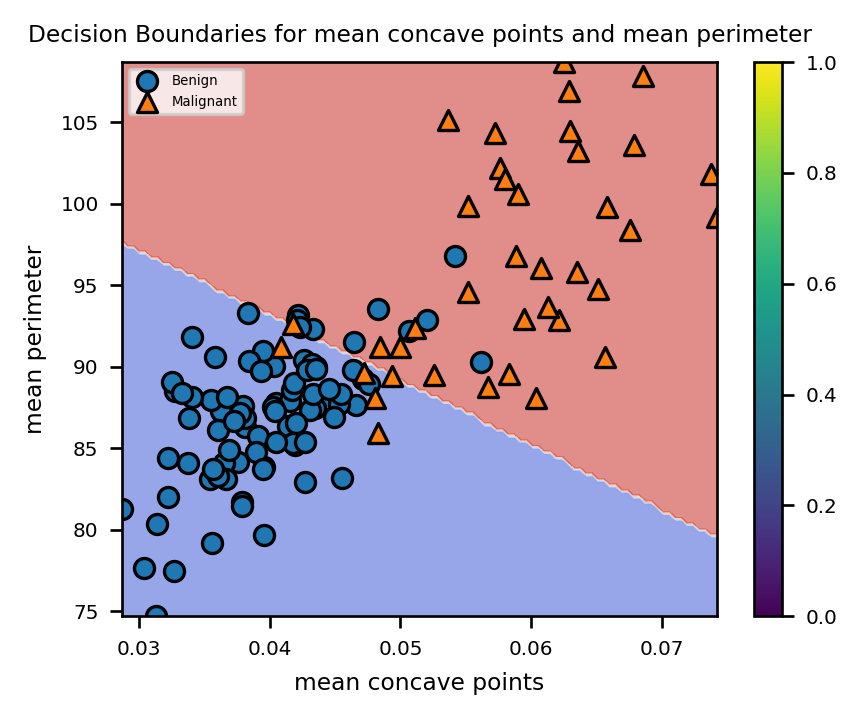

/Users/riyasebastian/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


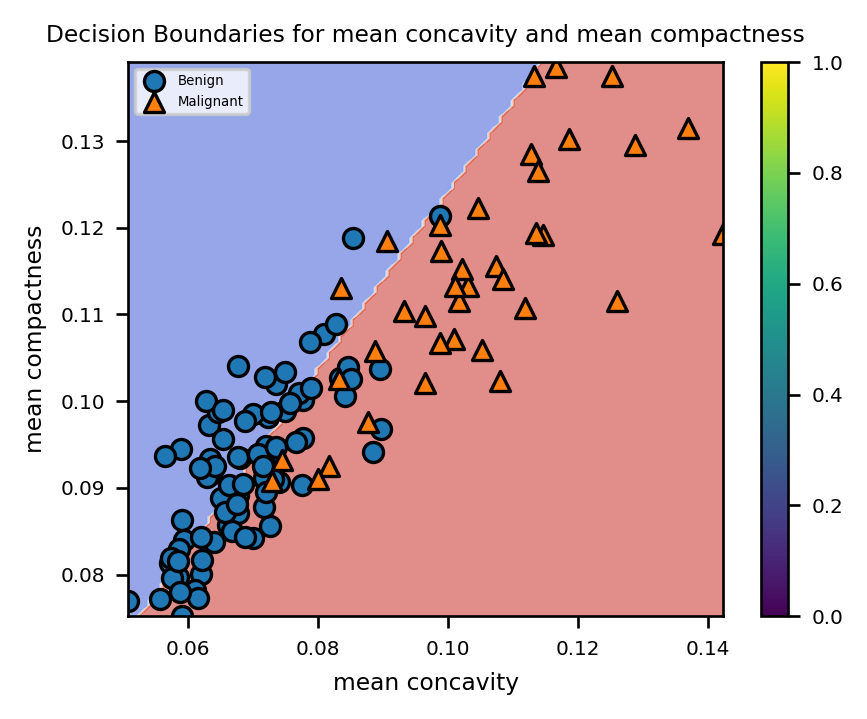

/Users/riyasebastian/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


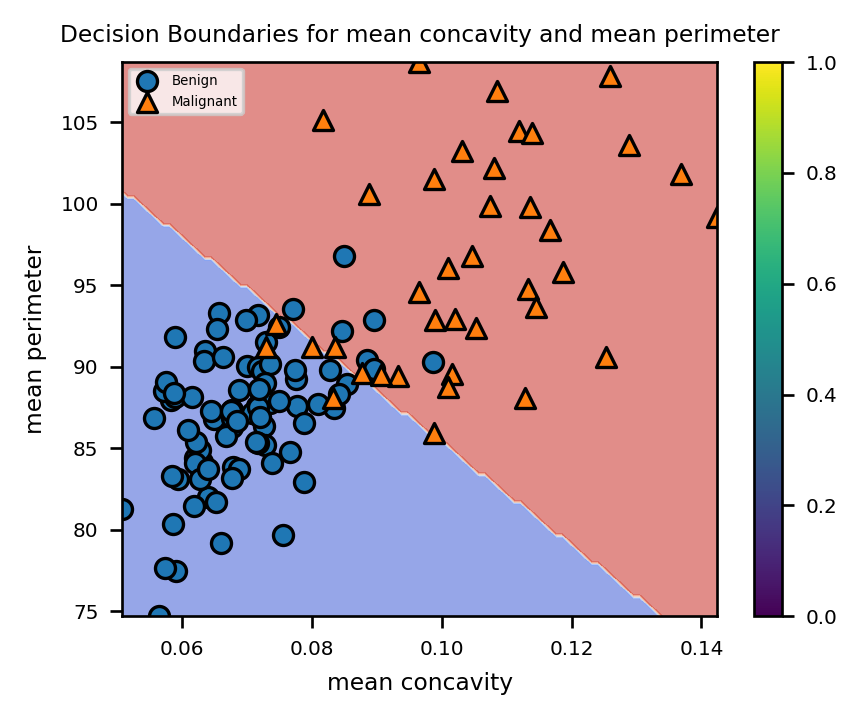

/Users/riyasebastian/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


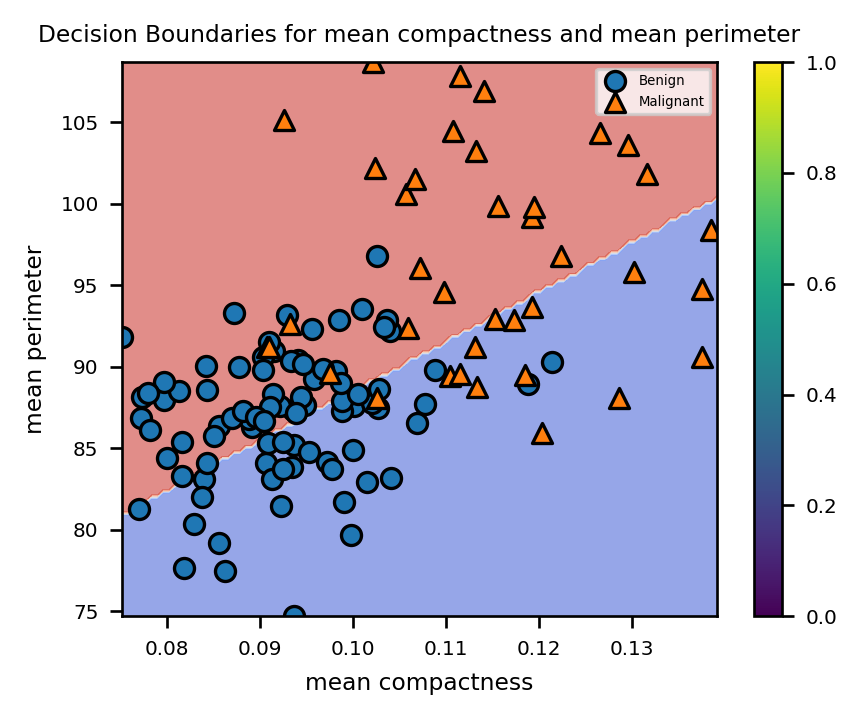

In [908]:
best_features = ['mean concave points', 'mean concavity', 'mean compactness', 'mean perimeter']

sgd_pipeline.fit(X_train[best_features], y_train)

malignant_mean = X_train.loc[y_train == 1, best_features].mean()
benign_mean = X_train.loc[y_train == 0, best_features].mean()
xmean = 0.5 * (malignant_mean + benign_mean)

pairs = [(0, 1),  (0, 2),  (0, 3), (1, 2), (1, 3), (2, 3) ]

for i, j in pairs:
    
    xx, yy = make_meshgrid(X_train[best_features].iloc[:, i], X_train[best_features].iloc[:, j])
    
    plt.figure(figsize=(4, 3))
    plot_contours(sgd_pipeline, xx, yy, xmean, i, j, cmap=plt.cm.coolwarm, alpha=0.6)
    plt.scatter(X_train.loc[y_train == 0, best_features[i]], X_train.loc[y_train == 0, best_features[j]], label='Benign', marker='o', edgecolors='k')
    plt.scatter(X_train.loc[y_train == 1, best_features[i]], X_train.loc[y_train == 1, best_features[j]], label='Malignant', marker='^', edgecolors='k')
    plt.xlabel(best_features[i])
    plt.ylabel(best_features[j])
    plt.title(f'Decision Boundaries for {best_features[i]} and {best_features[j]}', fontsize=7)
    plt.legend(fontsize = 4)
    plt.colorbar()
    plt.show()

### 4.3 Performance specification
**Does the final model meet the client's criteria?  Explain why or why not.** [100 words maximum]

In [ ]:
"""Yes, the final SGD model meets the client's criteria. The model has a recall value 0.9 which indicates that 
it has a 90% probability of detecting malignant cancer when it is present. And also the false positive rate is within the limit
of 20%. This means that the model is capable of identifying malignant cases with 97% accuracy and also ensures that it does not 
predict benign when the actual case is malignant."""